In [67]:
# create copies of the "healthy" and "hearing impaired" folders
import shutil
import os

# Path to the original folders
healthy_folder_path = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Healthy'
hearing_impaired_folder_path = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Hearing Impaired'

# Destination paths for the copied folders
copied_healthy_folder_path = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/temp/Healthy'
copied_hearing_impaired_folder_path = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/temp/Hearing Impaired'

# Create copies of the folders
shutil.copytree(healthy_folder_path, copied_healthy_folder_path)
shutil.copytree(hearing_impaired_folder_path, copied_hearing_impaired_folder_path)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Healthy'

In [ ]:
# Randomly select two subjects from each folder.
import os
import random

def random_subjects(folder_path, num_subjects):
    # Get a list of all subjects in the folder
    subjects = os.listdir(folder_path)

    # Randomly select two subjects
    selected_subjects = random.sample(subjects, num_subjects)

    return selected_subjects

# Example usage:
# healthy_folder_path = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/temp/Healthy'
# hearing_impaired_folder_path = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/temp/Hearing Impaired'

healthy_folder_path = '/home/wangg/REU-Hearing-Loss-Project/machine learning/temp/Healthy'
hearing_impaired_folder_path = '/home/wangg/REU-Hearing-Loss-Project/machine learning/temp/Hearing Impaired'
num_subjects_to_select = 2

selected_healthy_subjects = random_subjects(healthy_folder_path, num_subjects_to_select)
selected_hearing_impaired_subjects = random_subjects(hearing_impaired_folder_path, num_subjects_to_select)

print("Selected Healthy Subjects:", selected_healthy_subjects)
print("Selected Hearing Impaired Subjects:", selected_hearing_impaired_subjects)


Selected Healthy Subjects: ['Subject_033', 'Subject_030']
Selected Hearing Impaired Subjects: ['Subject_017', 'Subject_008']


Create folders in bash

In [ ]:
# Navigate to the specified directory
cd /home/wangg/REU-Hearing-Loss-Project/machine\ learning/allFolds/10folds-80-20 train test split

# Create 10 fold directories (fold1, fold2, ..., fold10)
for i in {1..10}; do
    mkdir -p fold$i/{train,test,Training,Testing}
done

In [ ]:
# Create a testing folder with images from these selected subjects, labeled accordingly. (DANGER)
import os
import shutil


def create_testing_folder(source_folder, selected_subjects, destination_folder, label):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Copy images from selected subjects to the testing folder with labels
    for subject_name in selected_subjects:
        subject_folder_path = os.path.join(source_folder, subject_name)
        data_files = os.listdir(subject_folder_path)

        for data_file in data_files:
            source_path = os.path.join(subject_folder_path, data_file)
            
            # Append the label to the file name
            labeled_file_name = f"{label}_{subject_name}_{data_file}"
            
            destination_path = os.path.join(destination_folder, labeled_file_name)
            
            # Copy the image to the testing folder
            shutil.copyfile(source_path, destination_path)
selected_healthy_subjects = ['Subject_023', 'Subject_031', 'Subject_022', 'Subject_027']
selected_hearing_impaired_subjects = ['Subject_019', 'Subject_002', 'Subject_042', 'Subject_001']

healthy_folder_path = '/home/wangg/REU-Hearing-Loss-Project/machine learning/temp/Healthy'
hearing_impaired_folder_path = '/home/wangg/REU-Hearing-Loss-Project/machine learning/temp/Hearing Impaired'

destination_testing_folder = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/allFolds/10folds - 80-20 train test split (includes all subjects)/fold10/test'
# Example usage for the "Healthy" folder
create_testing_folder(healthy_folder_path, selected_healthy_subjects, destination_testing_folder, label="Healthy")

# Example usage for the "Hearing Impaired" folder
create_testing_folder(hearing_impaired_folder_path, selected_hearing_impaired_subjects, destination_testing_folder, label="Hearing_Impaired")


In [ ]:
# script to add all subjects to a new folder, but remove the selected_healthy_subjects and 
# selected_hearing_impaired_subjects AND ALSO labels the images
import os
import os
import shutil

def create_training_folder(source_folder, selected_subjects, destination_folder, label):
    # Ensure the destination folder exists or create it
    # os.makedirs(destination_folder, exist_ok=True)

    # Get a list of all subjects in the source folder
    all_subjects = [subject for subject in os.listdir(source_folder) if not subject.startswith('.')]
    
    # Exclude the selected subjects
    remaining_subjects = list(set(all_subjects) - set(selected_subjects))

        # Copy images from selected subjects to the testing folder with labels
    for subject_name in remaining_subjects:
        subject_folder_path = os.path.join(source_folder, subject_name)
        data_files = os.listdir(subject_folder_path)

        for data_file in data_files:
            source_path = os.path.join(subject_folder_path, data_file)
            
            # Append the label to the file name
            labeled_file_name = f"{label}_{subject_name}_{data_file}"
            
            destination_path = os.path.join(destination_folder, labeled_file_name)
            
            # Copy the image to the testing folder
            shutil.copyfile(source_path, destination_path)


# Example usage:
source_folder_healthy = '/home/wangg/REU-Hearing-Loss-Project/machine learning/temp/Healthy'
source_folder_hearing_impaired = '/home/wangg/REU-Hearing-Loss-Project/machine learning/temp/Hearing Impaired'
destination_folder = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/allFolds/10folds - 80-20 train test split (includes all subjects)/fold10/train'


# Example selected subjects (replace this with your actual selected subjects)
selected_healthy_subjects = ['Subject_023', 'Subject_031', 'Subject_022', 'Subject_027']
selected_hearing_impaired_subjects = ['Subject_019', 'Subject_002', 'Subject_042', 'Subject_001']
# selected_healthy_subjects = ['Subject_021', 'Subject_022']
# selected_hearing_impaired_subjects = ['Subject_001', 'Subject_002']

# selected_healthy_subjects = ['Subject_023', 'Subject_024']
# selected_hearing_impaired_subjects = ['Subject_003', 'Subject_004']

# selected_healthy_subjects = ['Subject_025', 'Subject_026']
# selected_hearing_impaired_subjects = ['Subject_005', 'Subject_006']

# selected_healthy_subjects = ['Subject_027', 'Subject_028']
# selected_hearing_impaired_subjects = ['Subject_007', 'Subject_008']

# selected_healthy_subjects = ['Subject_029', 'Subject_030']
# selected_hearing_impaired_subjects = ['Subject_009', 'Subject_010']

# selected_healthy_subjects =  ['Subject_031', 'Subject_032']
# selected_hearing_impaired_subjects =['Subject_011', 'Subject_012']

# selected_healthy_subjects = ['Subject_033', 'Subject_034']
# selected_hearing_impaired_subjects =['Subject_013', 'Subject_014']

# selected_healthy_subjects = ['Subject_035', 'Subject_036']
# selected_hearing_impaired_subjects = ['Subject_015', 'Subject_016']

# selected_healthy_subjects = ['Subject_037', 'Subject_038']
# selected_hearing_impaired_subjects = ['Subject_017', 'Subject_018']


# selected_healthy_subjects = ['Subject_039', 'Subject_040']
# selected_hearing_impaired_subjects =['Subject_019', 'Subject_020']
# Create the training folder
create_training_folder(source_folder_healthy, selected_healthy_subjects, destination_folder, label="Healthy")
create_training_folder(source_folder_hearing_impaired, selected_hearing_impaired_subjects, destination_folder, label="Hearing_Impaired")


In [ ]:
# script to move all healthy labeled images to a healthy folder and move all hearing impaired 
# labeled images to a hearing impaired folder for this type of structure.

# with this form for 5 folds:
#     Folds
# Fold1
# Test

# 160 labeled images (80 healthy labeled images, 80 hearing impaired labeled images)
# Training
# 1600 labeled images (800 healthy labeled images, 800 hearing impaired labeled images
# Fold2
# Test
# 160 labeled images (80 healthy labeled images, 80 hearing impaired labeled images)
# Training
# 1600 labeled images (800 healthy labeled images, 800 hearing impaired labeled images
# ...

# go through 
import os
import shutil

def organize_fold_structure(fold_path):
    # Create the new structure: FoldX/Testing/Healthy, FoldX/Testing/Hearing_Impaired, FoldX/Training/Healthy, FoldX/Training/Hearing_Impaired
    testing_path = os.path.join(fold_path, 'Testing')
    os.makedirs(os.path.join(testing_path, 'Healthy'), exist_ok=True)
    os.makedirs(os.path.join(testing_path, 'Hearing_Impaired'), exist_ok=True)

    training_path = os.path.join(fold_path, 'Training')
    os.makedirs(os.path.join(training_path, 'Healthy'), exist_ok=True)
    os.makedirs(os.path.join(training_path, 'Hearing_Impaired'), exist_ok=True)

    # Move images to the new structure
    move_images_by_label(os.path.join(fold_path, 'test'), os.path.join(testing_path, 'Healthy'), os.path.join(testing_path, 'Hearing_Impaired'))
    move_images_by_label(os.path.join(fold_path, 'train'), os.path.join(training_path, 'Healthy'), os.path.join(training_path, 'Hearing_Impaired'))

def move_images_by_label(source_folder, healthy_folder, hearing_impaired_folder):
    for filename in os.listdir(source_folder):
        source_path = os.path.join(source_folder, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            if 'healthy' in filename.lower():
                destination_path = os.path.join(healthy_folder, filename)
            elif 'hearing_impaired' in filename.lower():
                destination_path = os.path.join(hearing_impaired_folder, filename)
            else:
                print(f"Unknown label for file: {filename}")
                continue

            shutil.move(source_path, destination_path)

# Specify the path to your Folds directory
folds_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/allFolds/10folds - 80-20 train test split (includes all subjects)'

# Organize the structure for each fold
for fold_number in range(1, 11):
    fold_path = os.path.join(folds_path, f'fold{fold_number}')
    organize_fold_structure(fold_path)


NOT A PART OF K FOLD BELOW

In [ ]:
# go into the existing database data is organized as follows and take out 2 healthy subjects and take out 
# 2 hearing impaired subjects and add them to the testing folder 

import os
import shutil
import random

# Specify the root directory for data organization
root_directory = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject'
train_directory = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/experiment with data split by subject/train'
test_directory = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/experiment with data split by subject/test'

# Number of subjects to select for testing
num_test_subjects_per_class = 2

# # Function to copy images from source to destination
# def copy_images(source_path, destination_path):
#     for root, dirs, files in os.walk(source_path):
#         for file in files:
#             source_file_path = os.path.join(root, file)
#             destination_file_path = os.path.join(destination_path, file)
#             shutil.copyfile(source_file_path, destination_file_path)

# Function to randomly select subjects for testing
def select_test_subjects(class_directory):
    all_subjects = os.listdir(class_directory)
    test_subjects = random.sample(all_subjects, num_test_subjects_per_class)
    return test_subjects

# Copy Healthy subjects to testing folder
healthy_directory = os.path.join(root_directory, 'Healthy')
test_healthy_directory = os.path.join(test_directory, 'Healthy')
os.makedirs(test_healthy_directory, exist_ok=True)

selected_healthy_subjects = select_test_subjects(healthy_directory)
for subject in selected_healthy_subjects:
    source_subject_path = os.path.join(healthy_directory, subject)
    destination_subject_path = os.path.join(test_healthy_directory, subject)
    shutil.copytree(source_subject_path, destination_subject_path)

# Copy Hearing Impaired subjects to testing folder
hearing_impaired_directory = os.path.join(root_directory, 'Hearing Impaired')
test_hearing_impaired_directory = os.path.join(test_directory, 'Hearing Impaired')
os.makedirs(test_hearing_impaired_directory, exist_ok=True)

selected_hearing_impaired_subjects = select_test_subjects(hearing_impaired_directory)
for subject in selected_hearing_impaired_subjects:
    source_subject_path = os.path.join(hearing_impaired_directory, subject)
    destination_subject_path = os.path.join(test_hearing_impaired_directory, subject)
    shutil.copytree(source_subject_path, destination_subject_path)

print("Testing data has been populated with selected subjects.")


Testing data has been populated with selected subjects.


In [ ]:
# script to go through each image within each folder to filter out non-image data like .DS_store
import os

def filter_non_images(folder_path):
    # Get a list of all files in the folder
    all_files = os.listdir(folder_path)

    # Filter out non-image files (you can customize the list of valid extensions)
    valid_extensions = ['.png']
    image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in valid_extensions)]

    # Filtered files
    non_image_files = list(set(all_files) - set(image_files))

    return non_image_files

# Root folder containing the k-fold data
root_folder = '/home/wangg/REU-Hearing-Loss-Project/machine learning/folds'

# Iterate through each fold
for fold_number in range(6, 11):
    fold_path = os.path.join(root_folder, f'Fold{fold_number}')

    # Test folder
    test_folder_path = os.path.join(fold_path, 'test')
    test_non_image_files = filter_non_images(test_folder_path)

    print(f'\nFold {fold_number} - Test Folder:')
    print('Non-Image Files:', test_non_image_files)

    # Training folder
    training_folder_path = os.path.join(fold_path, 'train')
    training_non_image_files = filter_non_images(training_folder_path)

    print(f'\nFold {fold_number} - Training Folder:')
    print('Non-Image Files:', training_non_image_files)


FileNotFoundError: [Errno 2] No such file or directory: '/home/wangg/REU-Hearing-Loss-Project/machine learning/folds/Fold6/test'

In [ ]:
# script if each fold folder follows the structure you mentioned (with 'testing' and 'training' subfolders, and further subfolders for 'Healthy' and 'Hearing impaired')

import os

def filter_non_images(folder_path):
    # Get a list of all files in the folder
    all_files = os.listdir(folder_path)

    # Filter out non-image files (you can customize the list of valid extensions)
    valid_extensions = ['.png']
    image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in valid_extensions)]

    # Filtered files
    non_image_files = list(set(all_files) - set(image_files))

    return non_image_files

# Root folder containing the k-fold data
root_folder = '/home/wangg/REU-Hearing-Loss-Project/machine learning/folds'

# Iterate through each fold
for fold_number in range(6, 11):
    fold_path = os.path.join(root_folder, f'fold{fold_number}')

    # Test folder
    test_folder_path = os.path.join(fold_path, 'Testing')
    test_non_image_files = filter_non_images(test_folder_path)

    print(f'\nFold {fold_number} - Test Folder:')
    print('Non-Image Files:', test_non_image_files)

    # Training folder
    training_folder_path = os.path.join(fold_path, 'Training')
    training_non_image_files = filter_non_images(training_folder_path)

    print(f'\nFold {fold_number} - Training Folder:')
    print('Non-Image Files:', training_non_image_files)



Fold 6 - Test Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 6 - Training Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 7 - Test Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 7 - Training Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 8 - Test Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 8 - Training Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 9 - Test Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 9 - Training Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 10 - Test Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']

Fold 10 - Training Folder:
Non-Image Files: ['Hearing_Impaired', 'Healthy']


In [ ]:
# script to move all healthy labeled images to a healthy folder and move all hearing impaired 
# labeled images to a hearing impaired folder for this type of structure.

# with this form for 5 folds:
#     Folds
# Fold1
# Test

# 160 labeled images (80 healthy labeled images, 80 hearing impaired labeled images)
# Training
# 1600 labeled images (800 healthy labeled images, 800 hearing impaired labeled images
# Fold2
# Test
# 160 labeled images (80 healthy labeled images, 80 hearing impaired labeled images)
# Training
# 1600 labeled images (800 healthy labeled images, 800 hearing impaired labeled images
# ...

# go through 
import os
import shutil

def organize_fold_structure(fold_path):
    # Create the new structure: FoldX/Testing/Healthy, FoldX/Testing/Hearing_Impaired, FoldX/Training/Healthy, FoldX/Training/Hearing_Impaired
    testing_path = os.path.join(fold_path, 'Testing')
    os.makedirs(os.path.join(testing_path, 'Healthy'), exist_ok=True)
    os.makedirs(os.path.join(testing_path, 'Hearing_Impaired'), exist_ok=True)

    training_path = os.path.join(fold_path, 'Training')
    os.makedirs(os.path.join(training_path, 'Healthy'), exist_ok=True)
    os.makedirs(os.path.join(training_path, 'Hearing_Impaired'), exist_ok=True)

    # Move images to the new structure
    move_images_by_label(os.path.join(fold_path, 'test'), os.path.join(testing_path, 'Healthy'), os.path.join(testing_path, 'Hearing_Impaired'))
    move_images_by_label(os.path.join(fold_path, 'train'), os.path.join(training_path, 'Healthy'), os.path.join(training_path, 'Hearing_Impaired'))

def move_images_by_label(source_folder, healthy_folder, hearing_impaired_folder):
    for filename in os.listdir(source_folder):
        source_path = os.path.join(source_folder, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            if 'healthy' in filename.lower():
                destination_path = os.path.join(healthy_folder, filename)
            elif 'hearing_impaired' in filename.lower():
                destination_path = os.path.join(hearing_impaired_folder, filename)
            else:
                print(f"Unknown label for file: {filename}")
                continue

            shutil.move(source_path, destination_path)

# Specify the path to your Folds directory
folds_path = '/home/wangg/REU-Hearing-Loss-Project/machine learning/newFolds'

# Organize the structure for each fold
for fold_number in range(1, 11):
    fold_path = os.path.join(folds_path, f'fold{fold_number}')
    organize_fold_structure(fold_path)


In [ ]:
from collections import defaultdict

# Define subjects for each fold
folds = {
    1: (['Subject_036', 'Subject_044'], ['Subject_017', 'Subject_019']),
    2: (['Subject_027', 'Subject_031'], ['Subject_001', 'Subject_009']),
    3: (['Subject_044', 'Subject_040'], ['Subject_002', 'Subject_042']),
    4: (['Subject_022', 'Subject_026'], ['Subject_007', 'Subject_014']),
    5: (['Subject_030', 'Subject_037'], ['Subject_008', 'Subject_003']),
    6: (['Subject_021', 'Subject_036'], ['Subject_042', 'Subject_014']),
    7: (['Subject_040', 'Subject_044'], ['Subject_013', 'Subject_007']),
    8: (['Subject_033', 'Subject_035'], ['Subject_003', 'Subject_042']),
    9: (['Subject_029', 'Subject_033'], ['Subject_015', 'Subject_008']),
    10: (['Subject_021', 'Subject_031'], ['Subject_020', 'Subject_006'])
}

# Create a defaultdict to count occurrences of each subject
subject_count = defaultdict(int)

# Iterate through folds and count subjects
for fold, (healthy, impaired) in folds.items():
    for subject in healthy + impaired:
        subject_count[subject] += 1

# Print the counts
for subject, count in subject_count.items():
    print(f"{subject}: {count} occurrences")


Subject_036: 2 occurrences
Subject_044: 3 occurrences
Subject_017: 1 occurrences
Subject_019: 1 occurrences
Subject_027: 1 occurrences
Subject_031: 2 occurrences
Subject_001: 1 occurrences
Subject_009: 1 occurrences
Subject_040: 2 occurrences
Subject_002: 1 occurrences
Subject_042: 3 occurrences
Subject_022: 1 occurrences
Subject_026: 1 occurrences
Subject_007: 2 occurrences
Subject_014: 2 occurrences
Subject_030: 1 occurrences
Subject_037: 1 occurrences
Subject_008: 2 occurrences
Subject_003: 2 occurrences
Subject_021: 2 occurrences
Subject_013: 1 occurrences
Subject_033: 2 occurrences
Subject_035: 1 occurrences
Subject_029: 1 occurrences
Subject_015: 1 occurrences
Subject_020: 1 occurrences
Subject_006: 1 occurrences


In [ ]:
# code for cropping all the images so they're normalized to 224 x 224

from PIL import Image
import os

# Define the paths to the folders that need cropping
folders = [
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\N1\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\N1\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\N2\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\N2\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P1\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P1\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P2\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P2\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P3\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\training\P3\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\N1\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\N1\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\N2\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\N2\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P1\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P1\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P2\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P2\Hearing Impaired',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P3\Healthy',
#     r'C:\Users\student\Documents\snhl-ERP\machine learning\testing\P3\Hearing Impaired'
# r'C:\Users\student\Documents\snhl-ERP\machine learning\generalized-dataset\Healthy',
# r'C:\Users\student\Documents\snhl-ERP\machine learning\generalized-dataset\Hearimg Impaired',
# r'C:\Users\student\Documents\snhl-ERP\machine learning\N1\Hearing Impaired',
# r'C:\Users\student\Documents\snhl-ERP\machine learning\N1\Not Hearing Impaired'
# r'C:\Users\student\Documents\snhl-ERP\machine learning\10ms interval dataset\Hearing Impaired- 10ms interval',
# r'C:\Users\student\Documents\snhl-ERP\machine learning\10ms interval dataset\Not Hearing Impaired- 10ms interval',
# r'C:\Users\student\Documents\snhl-ERP\machine learning\8ms interval dataset\Hearing Impaired- 8ms interval',
# r'C:\Users\student\Documents\snhl-ERP\machine learning\8ms interval dataset\Not Hearing Impaired- 8ms interval'
]

# Iterate over the specified folders
for folder in folders:
    # Iterate over the files in the folder
    for file in os.listdir(folder):
        # Check if the file is an image file
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            # Construct the full file path
            file_path = os.path.join(folder, file)

            # Open the image using PIL
            image = Image.open(file_path)

            # Get the dimensions of the image
            width, height = image.size

            # These are the parameters below for cropping each image
            size = 490
            left = 160  # Modify this value to adjust the leftmost position of the crop
            right = left + size  # Keep the rightmost position as the size of the square
            top = 73
            bottom = top + size

            # Crop the image to the center square
            cropped_image = image.crop((left, top, right, bottom))

            # Resize the image to (224, 224)
            resized_image = cropped_image.resize((224, 224))

            # Replace the original image with the cropped and resized image
            resized_image.save(file_path)


In [ ]:
# script to separate images based on the subject number in their filenames,
import os
import shutil

# Path to the directory containing the images
image_directory = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/split data 80-10-10/Healthy'

# Path to the directory where the folders will be created
target_directory = '/Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Healthy'

# Iterate through each file in the directory
for filename in os.listdir(image_directory):
    # Check if the file is a PNG image and contains the word "sub"
    if filename.endswith('.png') and 'sub' in filename:
        # Extract subject number from the filename
        subject_number = filename.split('sub-')[1].split('.')[0]
        
        # Create a folder for the subject if it doesn't exist
        subject_folder = os.path.join(target_directory, f'Subject_{subject_number}')
        os.makedirs(subject_folder, exist_ok=True)
        
        # Copy the image to the subject-specific folder
        source_path = os.path.join(image_directory, filename)
        destination_path = os.path.join(subject_folder, filename)
        shutil.copy(source_path, destination_path)
        print(f"Copied {filename} to {subject_folder}")

print("Images copied based on subject number.")


Copied topographic_map_millisecond_2.200000e+02ms_sub-031.png to /Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Healthy/Subject_031
Copied topographic_map_millisecond_390ms_sub-038.png to /Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Healthy/Subject_038
Copied topographic_map_millisecond_2.200000e+02ms_sub-025.png to /Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Healthy/Subject_025
Copied topographic_map_millisecond_70ms_sub-029.png to /Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by subject/Healthy/Subject_029
Copied topographic_map_millisecond_170ms_sub-022.png to /Users/GraceWang/Desktop/UNLV2023/hearingLossOriginalCodebase/REU-Hearing-Loss-Project/machine learning/data split by s

In [ ]:
import random

# Initial lists of subjects
all_healthy_subjects = [
    'Subject_021', 'Subject_022', 'Subject_023', 'Subject_024',
   'Subject_025', 'Subject_026', 'Subject_027', 'Subject_028',
   'Subject_029', 'Subject_030', 'Subject_031', 'Subject_032',
   'Subject_033', 'Subject_034', 'Subject_035', 'Subject_036',
   'Subject_037', 'Subject_038', 'Subject_039', 'Subject_040',
   'Subject_043', 'Subject_044'
]
all_hearing_impaired_subjects = [
   'Subject_001', 'Subject_005', 'Subject_009', 'Subject_020',
   'Subject_002', 'Subject_006', 'Subject_008', 'Subject_010', 'Subject_014',
   'Subject_003', 'Subject_007', 'Subject_011', 'Subject_015',
   'Subject_004', 'Subject_042', 'Subject_012', 'Subject_016',
   'Subject_017', 'Subject_041', 'Subject_013', 'Subject_018', 'Subject_019']

# Function to create folds
def create_fold(healthy_subjects, impaired_subjects):
    fold = random.sample(healthy_subjects, 4) + random.sample(impaired_subjects, 4)
    # random.shuffle(fold)
    return fold

# Creating 10 folds
for fold_number in range(1, 11):
    selected_healthy_subjects = create_fold(all_healthy_subjects, all_hearing_impaired_subjects)[:4]
    selected_hearing_impaired_subjects = create_fold(all_healthy_subjects, all_hearing_impaired_subjects)[4:]
    
    # Displaying the results for each fold
    print(f"Fold {fold_number}:")
    print("selected_healthy_subjects = ", selected_healthy_subjects)
    print("selected_hearing_impaired_subjects = ", selected_hearing_impaired_subjects)
    print()


Fold 1:
Selected Healthy Subjects: ['Subject_034', 'Subject_030', 'Subject_035', 'Subject_033']
Selected Impaired Subjects: ['Subject_012', 'Subject_020', 'Subject_018', 'Subject_004']

Fold 2:
Selected Healthy Subjects: ['Subject_037', 'Subject_032', 'Subject_039', 'Subject_021']
Selected Impaired Subjects: ['Subject_041', 'Subject_011', 'Subject_002', 'Subject_004']

Fold 3:
Selected Healthy Subjects: ['Subject_034', 'Subject_033', 'Subject_024', 'Subject_029']
Selected Impaired Subjects: ['Subject_002', 'Subject_009', 'Subject_003', 'Subject_042']

Fold 4:
Selected Healthy Subjects: ['Subject_039', 'Subject_032', 'Subject_038', 'Subject_026']
Selected Impaired Subjects: ['Subject_004', 'Subject_010', 'Subject_015', 'Subject_005']

Fold 5:
Selected Healthy Subjects: ['Subject_037', 'Subject_025', 'Subject_044', 'Subject_034']
Selected Impaired Subjects: ['Subject_004', 'Subject_042', 'Subject_020', 'Subject_013']

Fold 6:
Selected Healthy Subjects: ['Subject_034', 'Subject_021', 'Sub

Boxplot related scripts

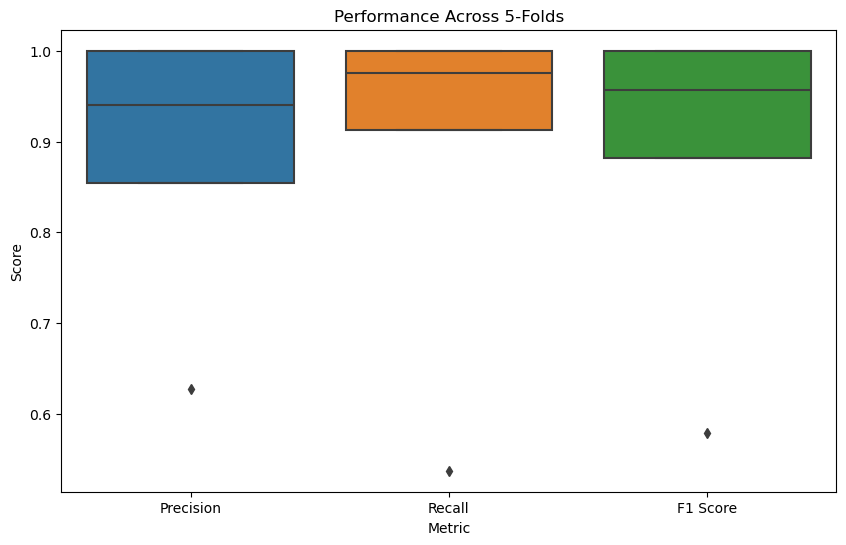


Summary of Results:
           Worst Fold  Avg. Fold  Best Fold
Metric                                     
F1 Score     0.579125   0.883671        1.0
Precision    0.627737   0.884259        1.0
Recall       0.537500   0.885000        1.0


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Precision, Recall, and F1 lists for each fold
precision_list = [0.6277372262773723, 0.8538011695906432, 0.9397590361445783, 1.0, 1.0]
recall_list = [0.5375, 0.9125, 0.975, 1.0, 1.0]
f1_list = [0.5791245791245792, 0.8821752265861027, 0.9570552147239264, 1.0, 1.0]

# Create a DataFrame for easy summary and visualization
df_results = pd.DataFrame({
    'Fold': np.repeat(range(1, 6), 3),
    'Metric': ['Precision'] * 5 + ['Recall'] * 5 + ['F1 Score'] * 5,
    'Score': precision_list + recall_list + f1_list
})

# Visualize the results with a single boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metric', y='Score', data=df_results)
plt.title('Performance Across 5-Folds')
plt.show()

# Summary table
summary_table = df_results.groupby('Metric')['Score'].describe()[['min', 'mean', 'max']]
summary_table.columns = ['Worst Fold', 'Avg. Fold', 'Best Fold']
print("\nSummary of Results:")
print(summary_table)


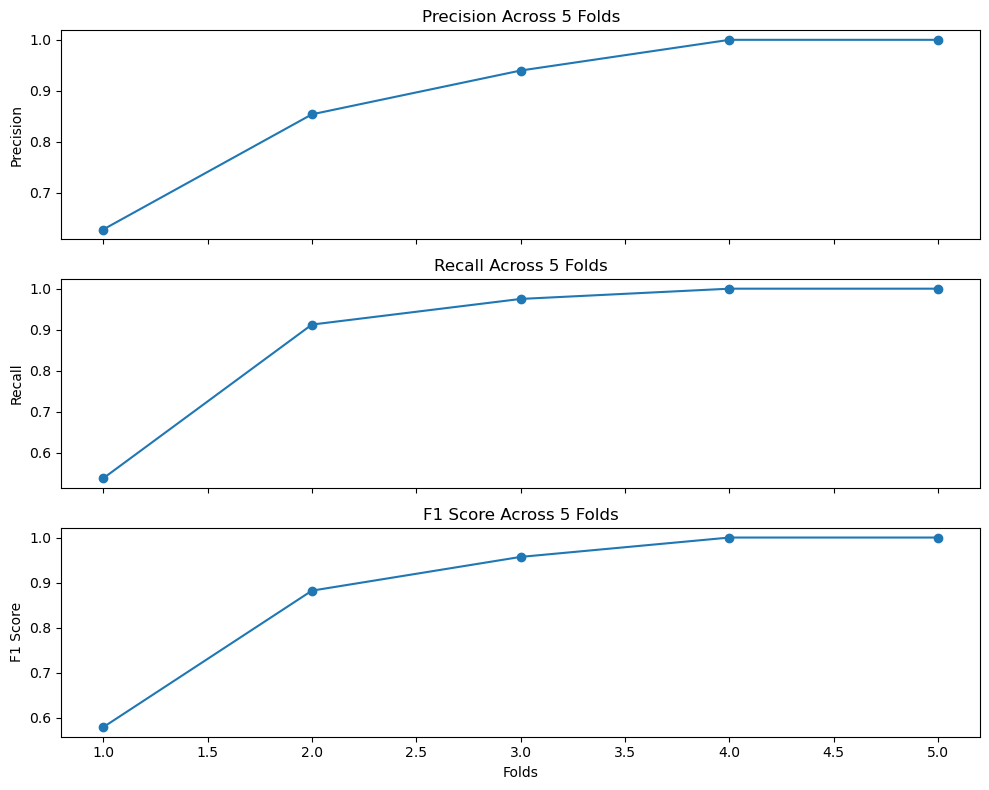

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
precision_list = [0.6277372262773723, 0.8538011695906432, 0.9397590361445783, 1.0, 1.0]
recall_list = [0.5375, 0.9125, 0.975, 1.0, 1.0]
f1_list = [0.5791245791245792, 0.8821752265861027, 0.9570552147239264, 1.0, 1.0]

# Create a figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot Precision
axes[0].plot(np.arange(1, 6), precision_list, marker='o')  # Use np.arange(1, 6) for x-axis ticks
axes[0].set_ylabel('Precision')
axes[0].set_title('Precision Across 5 Folds')

# Plot Recall
axes[1].plot(np.arange(1, 6), recall_list, marker='o')  # Use np.arange(1, 6) for x-axis ticks
axes[1].set_ylabel('Recall')
axes[1].set_title('Recall Across 5 Folds')

# Plot F1 Score
axes[2].plot(np.arange(1, 6), f1_list, marker='o')  # Use np.arange(1, 6) for x-axis ticks
axes[2].set_ylabel('F1 Score')
axes[2].set_xlabel('Folds')
axes[2].set_title('F1 Score Across 5 Folds')

plt.tight_layout()
plt.show()


 UPDATE WEIRD NAMING OF MILLISECONDS: 
 Python script that reads each line from the input file, checks if it contains the specified ordered milliseconds, and converts the corresponding values:

In [20]:
def convert_milliseconds(line):
    # Mapping of original values to converted values
    conversion_mapping = {
        '2.900000e+02ms': '290ms',
        '3.000000e+02ms': '300ms',
        '3.100000e+02ms': '310ms',
        '3.500000e+02ms': '350ms',
        '3.600000e+02ms': '360ms',
        '2.100000e+02ms': '210ms',
        '2.200000e+02ms': '220ms',
        '2.400000e+02ms': '240ms',
    }

    # Iterate over the conversion mapping and replace values in the line
    for original_value, converted_value in conversion_mapping.items():
        line = line.replace(original_value, converted_value)

    return line

def process_file(input_file_path, output_file_path):
    # Read lines from the input file
    with open(input_file_path, 'r') as input_file:
        lines = input_file.readlines()

    # Process each line and write to the output file
    with open(output_file_path, 'w') as output_file:
        for line in lines:
            processed_line = convert_milliseconds(line)
            output_file.write(processed_line)

# Specify input and output file paths
input_file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/finalPush/preTrained model/unfreezeLast4Layers/classification results/pretrained_unfreezeLast4Layers_classification_results_fold_10.txt'

output_file_path = input_file_path


# Call the function to process the file
process_file(input_file_path, output_file_path)


input_file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/5folds_classification_results_fold_1.txt'  # Replace with your actual file path
output_file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/5folds_classification_resultsUPDATED_fold_1.txt'  # Replace with your desired output file path


Dr. Morris' array approach creating a 6 x 40 array saved inside a csv file

fold_script_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/5folds_classification_results_fold_1.txt'

In [57]:
import numpy as np
import pandas as pd

# Define the order of milliseconds
ordered_milliseconds = [
    '00ms', '10ms', '20ms', '30ms', '40ms', '50ms', '60ms', '70ms', '80ms', '90ms',
    '100ms', '110ms', '120ms', '130ms', '140ms', '150ms', '160ms', '170ms', '180ms', '190ms',
    '200ms', '210ms', '220ms', '230ms',
    '240ms', '250ms', '260ms', '270ms', '280ms',
    '290ms', '300ms', '310ms', '320ms', '330ms', '340ms',
    '350ms', '360ms', '370ms', '380ms', '390ms'
]

# Initialize a 6x40 array filled with zeros (added two rows)
result_array = np.zeros((6, 40), dtype=int)

# Path to your fold script file
fold_script_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/finalPush/preTrained model/unfreezeLast4Layers/classification results/pretrained_unfreezeLast4Layers_classification_results_fold_10.txt'

# Read the fold script file and process each line
with open(fold_script_path, 'r') as file:
    # Iterate through each line
    for line_num, line in enumerate(file):
        # Skip the first line
        if line_num == 0:
            continue

        # Extract relevant information from the line
        tokens = line.split()

        # Find the column index corresponding to the milliseconds
        milliseconds_str = tokens[0].split('_millisecond_')[-1].split('_')[0]
        column_index = ordered_milliseconds.index(milliseconds_str)

        # Increment total counts
        if tokens[0].startswith('Healthy'):
            result_array[1][column_index] += 1
        elif tokens[0].startswith('Hearing'):
            result_array[3][column_index] += 1

        # Increment correct counts if true label and predicted label match
        if tokens[0].startswith('Healthy') and int(tokens[1]) == int(tokens[2]):
            result_array[0][column_index] += 1
        elif tokens[0].startswith('Hearing') and int(tokens[1]) == int(tokens[2]):
            result_array[2][column_index] += 1

# Calculate percentages for every column in rows 4, 5, and 6
result_array[4] = np.where(result_array[1] != 0, np.round(result_array[0] / result_array[1] * 100).astype(int), 0)
result_array[5] = np.where(result_array[3] != 0, np.round(result_array[2] / result_array[3] * 100).astype(int), 0)

# Print the result array
print(result_array)


# Print the required information
print("Milliseconds\tCorrect Healthy\tTotal Healthy\t% Correct Healthy\tCorrect Hearing Impaired\tTotal Hearing Impaired\t% Correct Hearing Impaired")
for i in range(len(ordered_milliseconds)):
    # Calculate percentages with a check for division by zero
    percent_healthy = result_array[0][i] / result_array[1][i] * 100 if result_array[1][i] != 0 else 0
    percent_impaired = result_array[2][i] / result_array[3][i] * 100 if result_array[3][i] != 0 else 0

    print(f"{ordered_milliseconds[i]}\t{result_array[0][i]}\t{result_array[1][i]}\t{percent_healthy:.2f}%"
          f"\t{result_array[2][i]}\t{result_array[3][i]}\t{percent_impaired:.2f}%")

# Convert the result array to a DataFrame with labels
df = pd.DataFrame(result_array, columns=ordered_milliseconds, index=[
    'Healthy Correct', 'Healthy Total', 'Impaired Correct', 'Impaired Total', 'Percent Correct Healthy', 'Percent Correct Impaired'
])

# Save the DataFrame to a CSV file
csv_file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/result_array.csv'
df.to_csv(csv_file_path)

# Print the DataFrame
print(df)

[[  1   0   0   2   1   0   2   3   1   1   1   3   1   2   1   1   2   2
    1   3   0   0   3   0   3   1   2   0   1   0   0   2   0   4   3   1
    0   1   1   1]
 [  4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4
    4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4
    4   4   4   4]
 [  3   4   2   4   3   4   1   1   3   3   4   2   2   1   4   3   3   4
    4   1   1   2   1   4   2   2   3   3   2   3   2   1   3   2   3   3
    2   2   2   3]
 [  4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4
    4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4
    4   4   4   4]
 [ 25   0   0  50  25   0  50  75  25  25  25  75  25  50  25  25  50  50
   25  75   0   0  75   0  75  25  50   0  25   0   0  50   0 100  75  25
    0  25  25  25]
 [ 75 100  50 100  75 100  25  25  75  75 100  50  50  25 100  75  75 100
  100  25  25  50  25 100  50  50  75  75  50  75  50  25  75  50  75  75
   50  50  50  75

Plots for all folds (5 folds in this case)

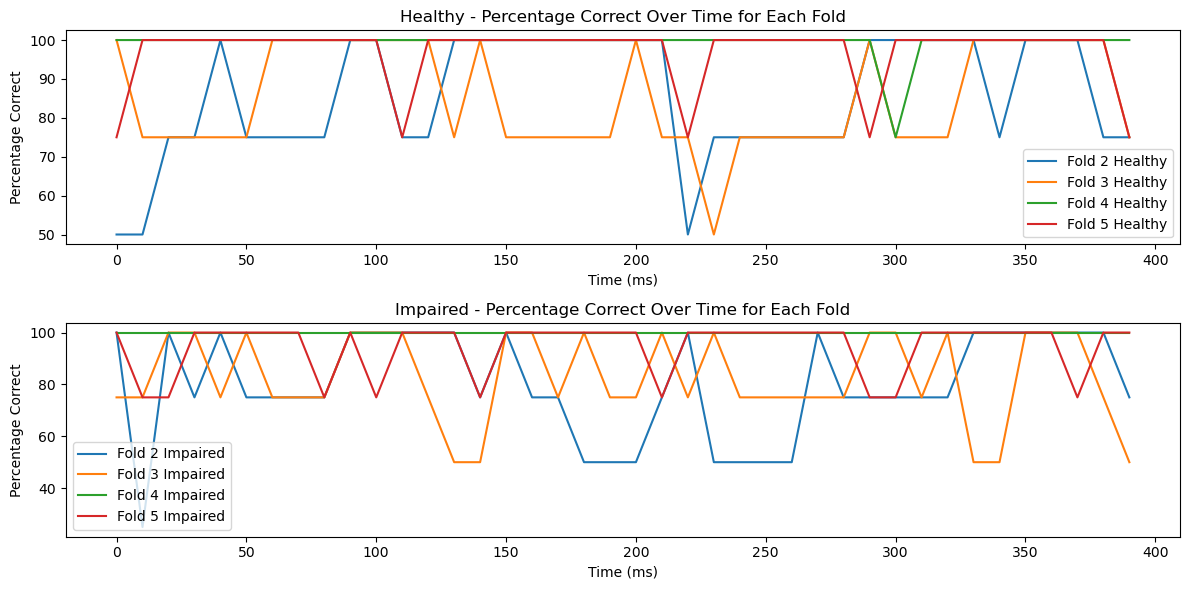

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Time': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390],
    'Fold 1 Healthy': [50,75,75,75,100,75,75,0,75,100,50,75,100,75,75,75,100,75,75,75,75,75,75,75,75,75,25,75,50,50,25,50,75,100,75,75,100,75,100,100],
    'Fold 1 Impaired': [75,75,50,50,25,50,25,50,50,75,50,50,75,50,75,50,50,100,100,100,75,75,25,50,75,100,75,25,25,25,0,25,0,50,50,50,50,50,100,50],
    'Fold 2 Healthy': [50,50,75,75,100,75,75,75,75,100,100,75,75,100,100,100,100,100,100,100,100,100,50,75,75,75,75,75,75,100,100,100,100,100,75,100,100,100,75,75],
    'Fold 2 Impaired': [100,25,100,75,100,75,75,75,75,100,100,100,100,100,75,100,75,75,50,50,50,75,100,50,50,50,50,100,75,75,75,75,75,100,100,100,100,100,100,75],
    'Fold 3 Healthy': [100,75,75,75,75,75,100,100,100,100,100,100,100,75,100,75,75,75,75,75,100,75,75,50,75,75,75,75,75,100,75,75,75,100,100,100,100,100,100,75],
    'Fold 3 Impaired': [75,75,100,100,75,100,75,75,75,100,100,100,75,50,50,100,100,75,100,75,75,100,75,100,75,75,75,75,75,100,100,75,100,50,50,100,100,100,75,50],
    'Fold 4 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100],
    'Fold 4 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 5 Healthy': [75,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,75],
    'Fold 5 Impaired': [100,75,75,100,100,100,100,100,75,100,75,100,100,100,75,100,100,100,100,100,100,75,100,100,100,100,100,100,100,75,75,100,100,100,100,100,100,75,100,100]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Healthy
plt.subplot(2, 1, 1)
for i in range(2, 6):
    plt.plot(df['Time'], df[f'Fold {i} Healthy'], label=f'Fold {i} Healthy')

plt.xlabel('Time (ms)')
plt.ylabel('Percentage Correct')
plt.title('Healthy - Percentage Correct Over Time for Each Fold')
plt.legend()

# Plot for Impaired
plt.subplot(2, 1, 2)
for i in range(2, 6):
    plt.plot(df['Time'], df[f'Fold {i} Impaired'], label=f'Fold {i} Impaired')

plt.xlabel('Time (ms)')
plt.ylabel('Percentage Correct')
plt.title('Impaired - Percentage Correct Over Time for Each Fold')
plt.legend()

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


Plots for 5 fold

Overall Average Accuracy for Healthy: 87.87%
Overall Average Accuracy for Hearing Impaired: 82.38%
     0       1       2       3       4       5       6       7       8       9       10      11      12      13      14      15      16      17      18      19      20      21      22      23      24      25      26      27      28      29      30      31      32      33      34      35      36      37      38      39
  -15.0    10.0     0.0     0.0    15.0     0.0    15.0    -5.0    15.0     5.0     5.0    -5.0     5.0    10.0    20.0     0.0    10.0     0.0     0.0     5.0    15.0     5.0    -5.0     0.0     5.0     0.0    -5.0     5.0     5.0    10.0     5.0    10.0    15.0    20.0    10.0     5.0    10.0    10.0     0.0    10.0


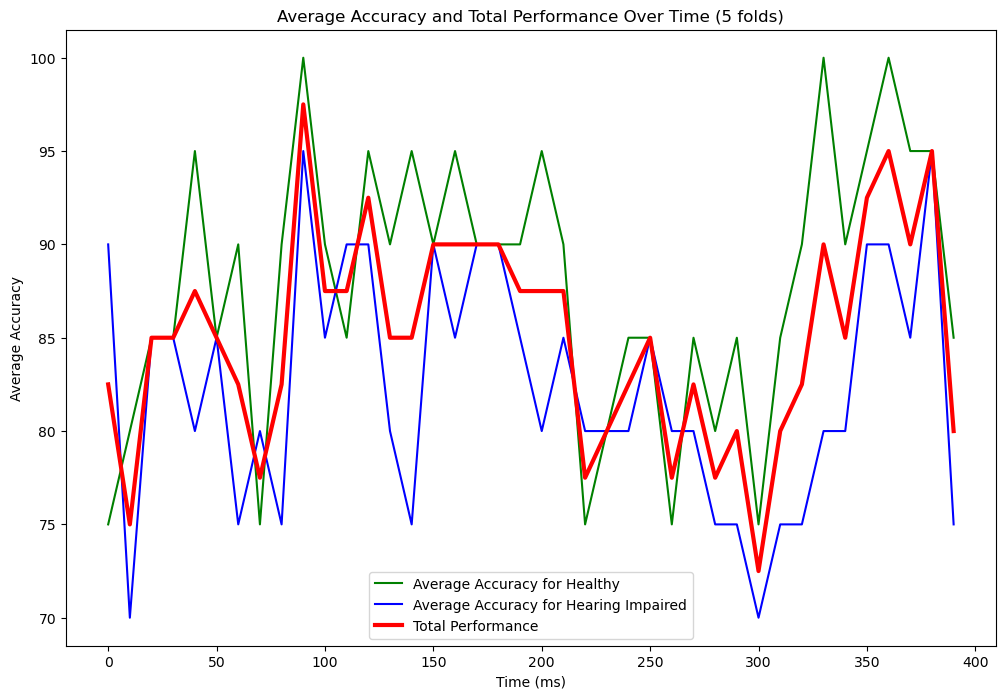

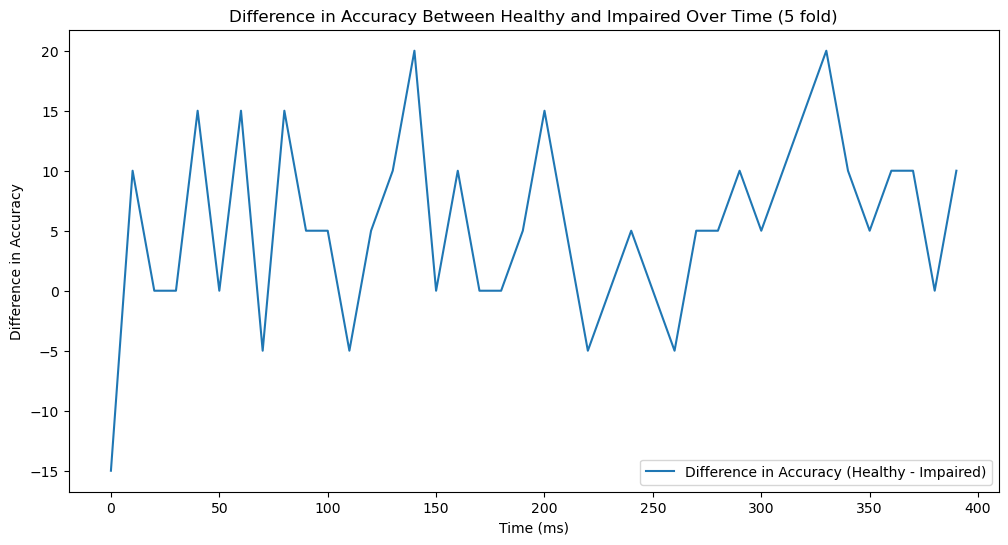

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Time': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390],
    'Fold 1 Healthy': [50,75,75,75,100,75,75,0,75,100,50,75,100,75,75,75,100,75,75,75,75,75,75,75,75,75,25,75,50,50,25,50,75,100,75,75,100,75,100,100],
    'Fold 1 Impaired': [75,75,50,50,25,50,25,50,50,75,50,50,75,50,75,50,50,100,100,100,75,75,25,50,75,100,75,25,25,25,0,25,0,50,50,50,50,50,100,50],
    'Fold 2 Healthy': [50,50,75,75,100,75,75,75,75,100,100,75,75,100,100,100,100,100,100,100,100,100,50,75,75,75,75,75,75,100,100,100,100,100,75,100,100,100,75,75],
    'Fold 2 Impaired': [100,25,100,75,100,75,75,75,75,100,100,100,100,100,75,100,75,75,50,50,50,75,100,50,50,50,50,100,75,75,75,75,75,100,100,100,100,100,100,75],
    'Fold 3 Healthy': [100,75,75,75,75,75,100,100,100,100,100,100,100,75,100,75,75,75,75,75,100,75,75,50,75,75,75,75,75,100,75,75,75,100,100,100,100,100,100,75],
    'Fold 3 Impaired': [75,75,100,100,75,100,75,75,75,100,100,100,75,50,50,100,100,75,100,75,75,100,75,100,75,75,75,75,75,100,100,75,100,50,50,100,100,100,75,50],
    'Fold 4 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100],
    'Fold 4 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 5 Healthy': [75,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,75],
    'Fold 5 Impaired': [100,75,75,100,100,100,100,100,75,100,75,100,100,100,75,100,100,100,100,100,100,75,100,100,100,100,100,100,100,75,75,100,100,100,100,100,100,75,100,100]
}

df = pd.DataFrame(data)


# Plotting the top three plots together
plt.figure(figsize=(12, 8))

# Plot Average Accuracy for Healthy
df_healthy = df.filter(like='Healthy').mean(axis=1)
plt.plot(df['Time'], df_healthy, label='Average Accuracy for Healthy', color='green')
# print(df_healthy.to_frame().T.to_string(index=False))

# Calculate the overall average of Healthy accuracy across all time points
df_healthy_avg = df.filter(like='Healthy').mean(axis=1) / 100  # Divide by 100
average_accuracy_healthy = df_healthy_avg.mean()
print(f'Overall Average Accuracy for Healthy: {average_accuracy_healthy:.2%}')

# Plot Average Accuracy for Impaired
df_impaired = df.filter(like='Impaired').mean(axis=1)
plt.plot(df['Time'], df_impaired, label='Average Accuracy for Hearing Impaired', color='blue')
# print(df_impaired.to_frame().T.to_string(index=False))

# Calculate the overall average of Impaired accuracy across all time points
df_impaired_avg = df.filter(like='Impaired').mean(axis=1) /100
average_accuracy_impaired = df_impaired_avg.mean()
print(f'Overall Average Accuracy for Hearing Impaired: {average_accuracy_impaired:.2%}')

# Calculate the difference between Healthy and Impaired at each time point
df_difference = df_healthy - df_impaired
print(df_difference.to_frame().T.to_string(index=False, col_space=7))
# Plot Total Performance
df_total = df.iloc[:, 1:].mean(axis=1)
plt.plot(df['Time'], df_total, label='Total Performance', color='red', linewidth=3)

# Set y-axis limits for the top three plots
# plt.ylim(60, 110)

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy and Total Performance Over Time (5 folds)')
plt.legend()

# Show the top three plots
plt.show()




# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df_difference, label='Difference in Accuracy (Healthy - Impaired)')
# plt.ylim(60, 110)  # Set y-axis limits

plt.xlabel('Time (ms)')
plt.ylabel('Difference in Accuracy')
plt.title('Difference in Accuracy Between Healthy and Impaired Over Time (5 fold)')
plt.legend()

# Display the plot
plt.show()


5 fold (including all subjects): calculate the percentage accuracy for each subject by counting the number of correct predictions and dividing it by the total number of images for that subject

In [2]:
import os

# Function to parse a line and extract information
def parse_line(line, line_number):
    try:
        parts = line.strip().split()
        image_name = parts[0]
        true_label = int(parts[1])
        predicted_label = float(parts[2])  # Use float instead of int for predicted label
        subject_number = int(image_name.split('_')[-1].split('-')[-1].split('.')[0])
        return subject_number, image_name, true_label, predicted_label
    except ValueError as e:
        print(f"Error parsing line {line_number}: {e}")
        print(f"Line content: {line}")
        raise  # Re-raise the exception to stop the program

# Function to process a file and calculate accuracy for each subject
def process_file(file_path):
    subject_results = {}
    
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            if line.startswith('Image Name'):
                continue  # Skip header line
            subject_number, image_name, true_label, predicted_label = parse_line(line, line_number)
            
            # Initialize subject results if not already present
            if subject_number not in subject_results:
                subject_results[subject_number] = {'correct': 0, 'total': 0}
            
            # Update results based on the classification
            if true_label == predicted_label:
                subject_results[subject_number]['correct'] += 1
            subject_results[subject_number]['total'] += 1

            # Print true and predicted labels for each image
            # print(f"Image: {image_name}, True Label: {true_label}, Predicted Label: {predicted_label}")

    # Calculate and print accuracy for each subject
    print(f"\nAccuracy for each subject in {file_path}:")
    for subject, results in subject_results.items():
        accuracy = (results['correct'] / results['total']) * 100 if results['total'] > 0 else 0
        print(f"Subject {subject}: {accuracy:.2f}% ({results['correct']} out of {results['total']} images)")

# Specify the directory containing the text files
directory_path = "/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results"

# List all text files in the directory
txt_files = sorted([file for file in os.listdir(directory_path) if file.endswith('.txt')])
print(txt_files)
# Process each text file
for txt_file in txt_files:
    file_path = os.path.join(directory_path, txt_file)
    process_file(file_path)


['5folds_classification_results_fold_1.txt', '5folds_classification_results_fold_2.txt', '5folds_classification_results_fold_3.txt', '5folds_classification_results_fold_4.txt', '5folds_classification_results_fold_5.txt']

Accuracy for each subject in /home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/5folds_classification_results_fold_1.txt:
Subject 21: 70.00% (28 out of 40 images)
Subject 25: 45.00% (18 out of 40 images)
Subject 29: 97.50% (39 out of 40 images)
Subject 36: 77.50% (31 out of 40 images)
Subject 1: 62.50% (25 out of 40 images)
Subject 5: 35.00% (14 out of 40 images)
Subject 9: 37.50% (15 out of 40 images)
Subject 20: 85.00% (34 out of 40 images)

Accuracy for each subject in /home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/5folds_classification_results_fold_2.txt:
Subject 22: 100.00% (40 out of 40 images)
Subject 26: 80.00% (32 out of 40

script to save the values above in a txt file

In [3]:
import os

# Function to parse a line and extract information
def parse_line(line, line_number):
    try:
        parts = line.strip().split()
        image_name = parts[0]
        true_label = int(parts[1])
        predicted_label = float(parts[2])  # Use float instead of int for predicted label
        subject_number = int(image_name.split('_')[-1].split('-')[-1].split('.')[0])
        return subject_number, image_name, true_label, predicted_label
    except ValueError as e:
        print(f"Error parsing line {line_number}: {e}")
        print(f"Line content: {line}")
        raise  # Re-raise the exception to stop the program

# Function to process a file and calculate accuracy for each subject
def process_file(file_path):
    subject_results = {}
    
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            if line.startswith('Image Name'):
                continue  # Skip header line
            subject_number, image_name, true_label, predicted_label = parse_line(line, line_number)
            
            # Initialize subject results if not already present
            if subject_number not in subject_results:
                subject_results[subject_number] = {'correct': 0, 'total': 0}
            
            # Update results based on the classification
            if true_label == predicted_label:
                subject_results[subject_number]['correct'] += 1
            subject_results[subject_number]['total'] += 1

    # Calculate accuracy for each subject
    accuracy_info = []
    for subject, results in subject_results.items():
        accuracy = (results['correct'] / results['total']) * 100 if results['total'] > 0 else 0
        accuracy_info.append(f"Subject {subject}: {accuracy:.2f}% ({results['correct']} out of {results['total']} images)")

    return accuracy_info

# Specify the directory containing the text files
directory_path = "/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results"

# List all text files in the directory
txt_files = sorted([file for file in os.listdir(directory_path) if file.endswith('.txt')])

# Process each text file and accumulate accuracy information
all_accuracy_info = []
for txt_file in txt_files:
    file_path = os.path.join(directory_path, txt_file)
    accuracy_info = process_file(file_path)
    all_accuracy_info.extend(accuracy_info)

# Write all accuracy information to a single text file
output_file_path = "all_accuracies_by_subject_5fold.txt"
with open(output_file_path, 'w') as output_file:
    output_file.write('\n'.join(all_accuracy_info))

print(f"All accuracy information written to {output_file_path}")


All accuracy information written to all_accuracies_by_subject_5fold.txt


script to sort the accuracies by subject by subject number

In [4]:
# Read data from the file
file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/classification results/all_accuracies_by_subject_5fold.txt'  # Replace with your actual file path

with open(file_path, 'r') as file:
    data = file.read()

# Split the data into lines
lines = data.split('\n')

# Sort lines by subject number
sorted_lines = sorted(lines, key=lambda x: int(x.split(':')[0].split()[-1]))

# Save sorted lines back to the original file
with open(file_path, 'w') as file:
    file.write('\n'.join(sorted_lines))


Line Graph of subject's accuracies by class

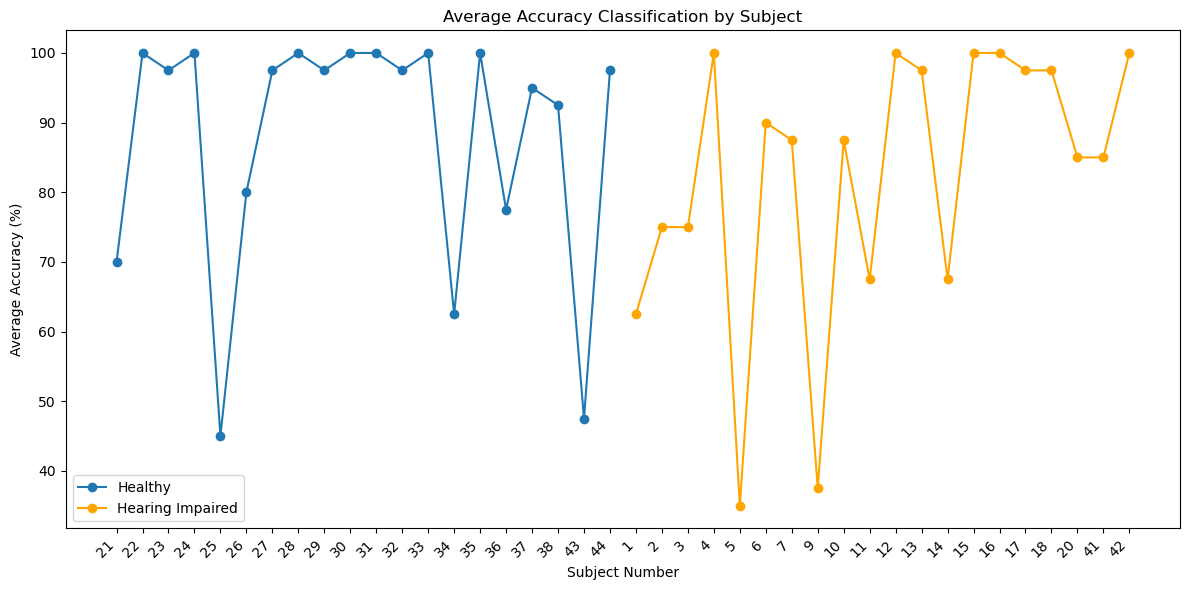

In [5]:
import matplotlib.pyplot as plt

# Your data for healthy subjects
healthy_data = [
    ("21", 70.00),
    ("22", 100.00),
    ("23", 97.50),
    ("24", 100.00),
    ("25", 45.00),
    ("26", 80.00),
    ("27", 97.50),
    ("28", 100.00),
    ("29", 97.50),
    ("30", 100.00),
    ("31", 100.00),
    ("32", 97.50),
    ("33", 100.00),
    ("34", 62.50),
    ("35", 100.00),
    ("36", 77.50),
    ("37", 95.00),
    ("38", 92.50),
    ("43", 47.50),
    ("44", 97.50)
]

# Your data for hearing impaired subjects
impaired_data = [
    ("1", 62.50),
    ("2", 75.00),
    ("3", 75.00),
    ("4", 100.00),
    ("5", 35.00),
    ("6", 90.00),
    ("7", 87.50),
    ("9", 37.50),
    ("10", 87.50),
    ("11", 67.50),
    ("12", 100.00),
    ("13", 97.50),
    ("14", 67.50),
    ("15", 100.00),
    ("16", 100.00),
    ("17", 97.50),
    ("18", 97.50),
    ("20", 85.00),
    ("41", 85.00),
    ("42", 100.00)
]

# Extract subject numbers and accuracies for healthy subjects
subjects_healthy = [subject for subject, _ in healthy_data]
accuracies_healthy = [accuracy for _, accuracy in healthy_data]

# Extract subject numbers and accuracies for impaired subjects
subjects_impaired = [subject for subject, _ in impaired_data]
accuracies_impaired = [accuracy for _, accuracy in impaired_data]

# Create a line graph for both healthy and impaired subjects
plt.figure(figsize=(12, 6))
plt.plot(subjects_healthy, accuracies_healthy, marker='o', linestyle='-', label='Healthy')
plt.plot(subjects_impaired, accuracies_impaired, marker='o', linestyle='-', color='orange', label='Hearing Impaired')

# Add labels and title
plt.xlabel('Subject Number')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy Classification by Subject')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Plots for all folds (10 fold)

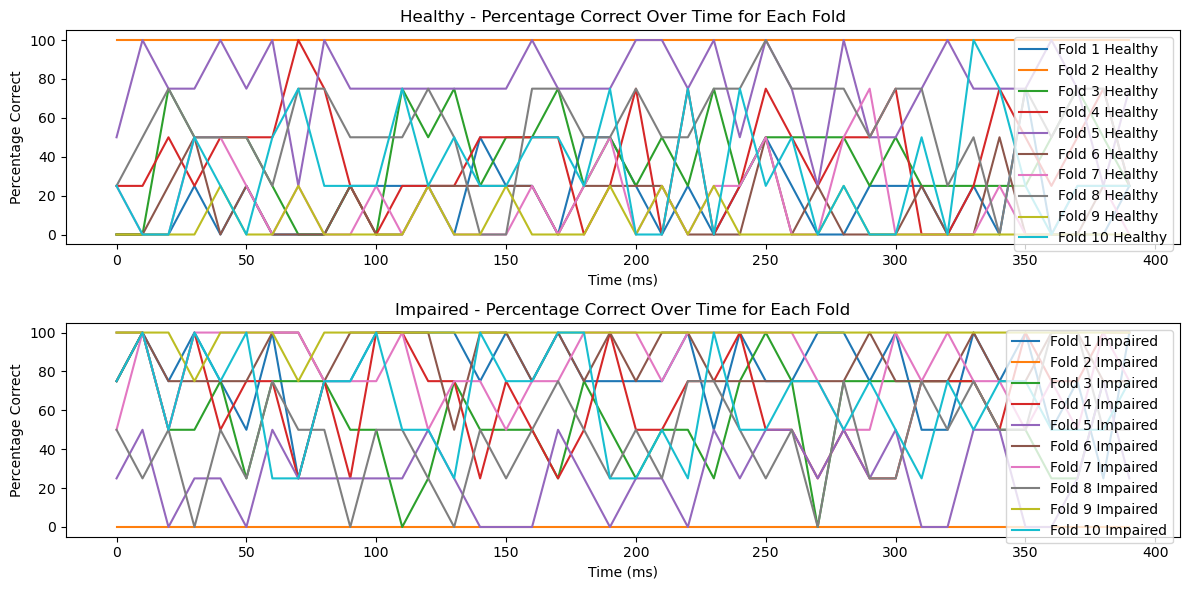

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
       'Time': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390],
    'Fold 1 Healthy': [0,0,0,25,0,25,0,0,0,25,25,25,25,0,50,25,25,0,50,50,25,0,25,0,25,50,25,0,0,25,25,25,0,25,0,75,0,0,0,25],
    'Fold 1 Impaired': [75,100,75,100,75,50,100,25,75,75,100,100,100,100,75,100,75,100,75,75,75,75,100,50,100,75,75,100,100,75,100,50,50,100,75,100,50,75,25,100],
    'Fold 2 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 2 Impaired': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Fold 3 Healthy': [0,0,75,50,50,50,25,0,0,25,0,75,50,75,25,50,50,75,25,50,25,50,25,75,25,50,50,50,50,25,50,25,25,25,25,25,50,75,50,25],
    'Fold 3 Impaired': [75,100,50,50,75,25,75,75,75,50,50,0,25,75,50,50,50,25,75,50,25,50,50,25,75,100,75,0,75,75,75,75,75,75,50,50,25,25,75,75],
    'Fold 4 Healthy': [25,25,50,25,50,50,50,100,75,25,0,25,25,25,50,50,50,50,0,25,75,0,75,0,25,75,50,25,50,50,75,0,0,25,75,50,25,50,75,25],
    'Fold 4 Impaired': [75,100,50,100,50,75,75,25,75,25,100,100,75,75,25,75,50,25,50,100,50,50,75,75,100,50,50,25,50,25,25,75,75,75,50,100,75,75,100,100],
    'Fold 5 Healthy': [50,100,75,75,100,75,100,25,100,75,75,75,75,75,75,75,100,75,75,75,100,100,75,100,50,100,75,25,100,50,50,75,100,75,75,75,100,75,25,75],
    'Fold 5 Impaired': [25,50,0,25,25,0,50,25,25,25,25,25,50,25,0,0,0,50,25,0,25,25,0,50,25,50,50,25,50,25,50,0,0,50,50,0,0,25,75,25],
    'Fold 6 Healthy': [0,0,25,50,0,25,0,0,0,25,0,0,25,25,25,25,25,0,25,25,25,25,0,0,0,50,0,25,0,0,0,25,0,0,50,0,0,0,25,25],
    'Fold 6 Impaired': [100,100,75,75,75,75,100,100,75,100,100,100,100,50,100,100,75,100,75,100,75,100,100,75,75,75,75,75,75,100,75,75,75,100,75,75,100,100,75,75],
    'Fold 7 Healthy': [25,0,0,50,50,25,0,25,0,0,25,0,25,0,0,0,25,0,25,50,0,25,0,25,25,50,0,0,50,75,0,0,0,0,25,0,0,25,25,0],
    'Fold 7 Impaired': [50,100,50,100,100,100,100,100,75,75,75,100,50,75,75,50,75,75,100,100,100,75,100,100,100,100,100,75,50,50,100,75,100,75,75,50,75,50,100,75],
    'Fold 8 Healthy': [25,50,75,50,50,50,25,75,75,50,50,50,75,50,0,0,75,75,50,50,75,50,50,75,75,100,75,75,75,50,75,75,25,50,0,75,50,75,75,25],
    'Fold 8 Impaired': [50,25,50,0,50,25,75,50,50,0,50,50,25,0,50,25,50,75,50,25,50,25,75,75,50,25,50,0,75,25,25,75,50,75,50,50,100,100,50,50],
    'Fold 9 Healthy': [0,0,0,0,25,0,0,25,0,0,0,0,25,0,0,25,0,0,0,25,0,25,0,25,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0],
    'Fold 9 Impaired': [100,100,100,75,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 10 Healthy': [25,0,0,50,25,0,50,75,25,25,25,75,25,50,25,25,50,50,25,75,0,0,75,0,75,25,50,0,25,0,0,50,0,100,75,25,0,25,25,25],
    'Fold 10 Impaired': [75,100,50,100,75,100,25,25,75,75,100,50,50,25,100,75,75,100,100,25,25,50,25,100,50,50,75,75,50,75,50,25,75,50,75,75,50,50,50,75]
}


df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Healthy
plt.subplot(2, 1, 1)
for i in range(1, 11):
    plt.plot(df['Time'], df[f'Fold {i} Healthy'], label=f'Fold {i} Healthy')

plt.xlabel('Time (ms)')
plt.ylabel('Percentage Correct')
plt.title('Healthy - Percentage Correct Over Time for Each Fold')
plt.legend()

# Plot for Impaired
plt.subplot(2, 1, 2)
for i in range(1, 11):
    plt.plot(df['Time'], df[f'Fold {i} Impaired'], label=f'Fold {i} Impaired')

plt.xlabel('Time (ms)')
plt.ylabel('Percentage Correct')
plt.title('Impaired - Percentage Correct Over Time for Each Fold')
plt.legend()

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


Plots for 10 folds

Overall Average Accuracy for Healthy: 39.50%
Overall Average Accuracy for Hearing Impaired: 60.38%


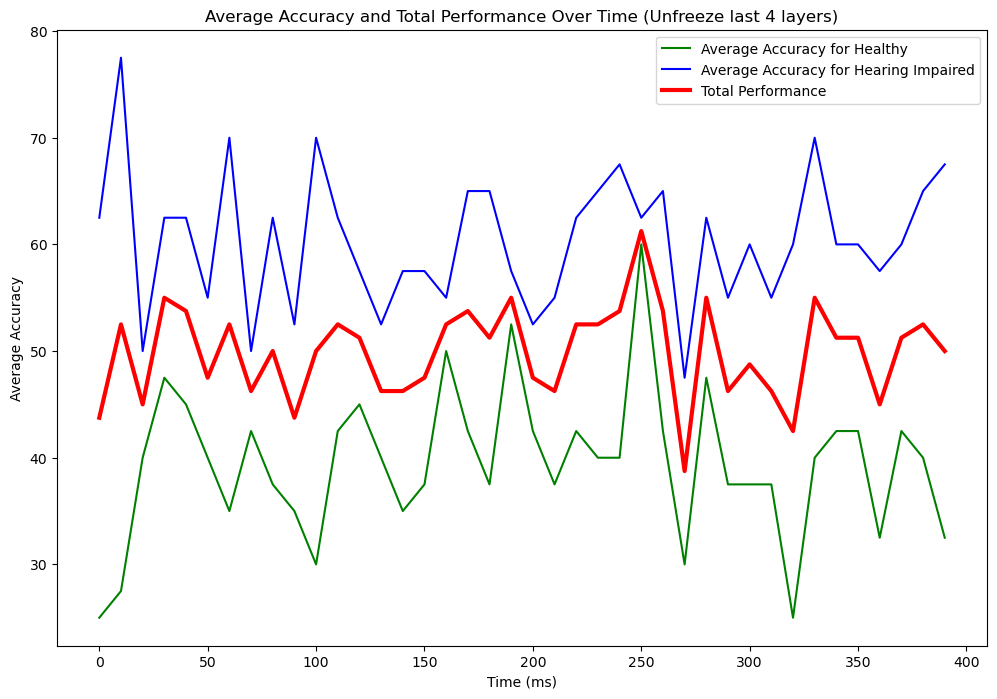

Differences Array:
Differences Array:
    Difference
0        -37.5
1        -50.0
2        -10.0
3        -15.0
4        -17.5
5        -15.0
6        -35.0
7         -7.5
8        -25.0
9        -17.5
10       -40.0
11       -20.0
12       -12.5
13       -12.5
14       -22.5
15       -20.0
16        -5.0
17       -22.5
18       -27.5
19        -5.0
20       -10.0
21       -17.5
22       -20.0
23       -25.0
24       -27.5
25        -2.5
26       -22.5
27       -17.5
28       -15.0
29       -17.5
30       -22.5
31       -17.5
32       -35.0
33       -30.0
34       -17.5
35       -17.5
36       -25.0
37       -17.5
38       -25.0
39       -35.0
Differences Array:
[-37.5 -50.  -10.  -15.  -17.5 -15.  -35.   -7.5 -25.  -17.5 -40.  -20.
 -12.5 -12.5 -22.5 -20.   -5.  -22.5 -27.5  -5.  -10.  -17.5 -20.  -25.
 -27.5  -2.5 -22.5 -17.5 -15.  -17.5 -22.5 -17.5 -35.  -30.  -17.5 -17.5
 -25.  -17.5 -25.  -35. ]


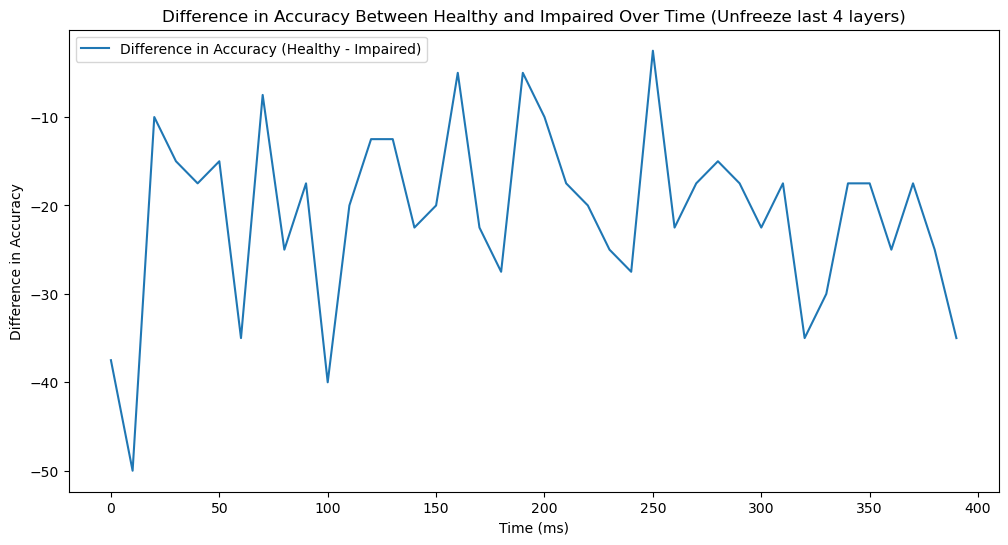

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
# from tabulate import tabulate

# Sample data

data = {
       'Time': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390],
    'Fold 1 Healthy': [0,0,0,25,0,25,0,0,0,25,25,25,25,0,50,25,25,0,50,50,25,0,25,0,25,50,25,0,0,25,25,25,0,25,0,75,0,0,0,25],
    'Fold 1 Impaired': [75,100,75,100,75,50,100,25,75,75,100,100,100,100,75,100,75,100,75,75,75,75,100,50,100,75,75,100,100,75,100,50,50,100,75,100,50,75,25,100],
    'Fold 2 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 2 Impaired': [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'Fold 3 Healthy': [0,0,75,50,50,50,25,0,0,25,0,75,50,75,25,50,50,75,25,50,25,50,25,75,25,50,50,50,50,25,50,25,25,25,25,25,50,75,50,25],
    'Fold 3 Impaired': [75,100,50,50,75,25,75,75,75,50,50,0,25,75,50,50,50,25,75,50,25,50,50,25,75,100,75,0,75,75,75,75,75,75,50,50,25,25,75,75],
    'Fold 4 Healthy': [25,25,50,25,50,50,50,100,75,25,0,25,25,25,50,50,50,50,0,25,75,0,75,0,25,75,50,25,50,50,75,0,0,25,75,50,25,50,75,25],
    'Fold 4 Impaired': [75,100,50,100,50,75,75,25,75,25,100,100,75,75,25,75,50,25,50,100,50,50,75,75,100,50,50,25,50,25,25,75,75,75,50,100,75,75,100,100],
    'Fold 5 Healthy': [50,100,75,75,100,75,100,25,100,75,75,75,75,75,75,75,100,75,75,75,100,100,75,100,50,100,75,25,100,50,50,75,100,75,75,75,100,75,25,75],
    'Fold 5 Impaired': [25,50,0,25,25,0,50,25,25,25,25,25,50,25,0,0,0,50,25,0,25,25,0,50,25,50,50,25,50,25,50,0,0,50,50,0,0,25,75,25],
    'Fold 6 Healthy': [0,0,25,50,0,25,0,0,0,25,0,0,25,25,25,25,25,0,25,25,25,25,0,0,0,50,0,25,0,0,0,25,0,0,50,0,0,0,25,25],
    'Fold 6 Impaired': [100,100,75,75,75,75,100,100,75,100,100,100,100,50,100,100,75,100,75,100,75,100,100,75,75,75,75,75,75,100,75,75,75,100,75,75,100,100,75,75],
    'Fold 7 Healthy': [25,0,0,50,50,25,0,25,0,0,25,0,25,0,0,0,25,0,25,50,0,25,0,25,25,50,0,0,50,75,0,0,0,0,25,0,0,25,25,0],
    'Fold 7 Impaired': [50,100,50,100,100,100,100,100,75,75,75,100,50,75,75,50,75,75,100,100,100,75,100,100,100,100,100,75,50,50,100,75,100,75,75,50,75,50,100,75],
    'Fold 8 Healthy': [25,50,75,50,50,50,25,75,75,50,50,50,75,50,0,0,75,75,50,50,75,50,50,75,75,100,75,75,75,50,75,75,25,50,0,75,50,75,75,25],
    'Fold 8 Impaired': [50,25,50,0,50,25,75,50,50,0,50,50,25,0,50,25,50,75,50,25,50,25,75,75,50,25,50,0,75,25,25,75,50,75,50,50,100,100,50,50],
    'Fold 9 Healthy': [0,0,0,0,25,0,0,25,0,0,0,0,25,0,0,25,0,0,0,25,0,25,0,25,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0],
    'Fold 9 Impaired': [100,100,100,75,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 10 Healthy': [25,0,0,50,25,0,50,75,25,25,25,75,25,50,25,25,50,50,25,75,0,0,75,0,75,25,50,0,25,0,0,50,0,100,75,25,0,25,25,25],
    'Fold 10 Impaired': [75,100,50,100,75,100,25,25,75,75,100,50,50,25,100,75,75,100,100,25,25,50,25,100,50,50,75,75,50,75,50,25,75,50,75,75,50,50,50,75]
}

df = pd.DataFrame(data)

# Plotting the top three plots together
plt.figure(figsize=(12, 8))

# Plot Average Accuracy for Healthy
df_healthy = df.filter(like='Healthy').mean(axis=1)
plt.plot(df['Time'], df_healthy, label='Average Accuracy for Healthy', color='green')
# print(df_healthy.to_frame().T.to_string(index=False))

# Calculate the overall average of Healthy accuracy across all time points
df_healthy_avg = df.filter(like='Healthy').mean(axis=1) / 100  # Divide by 100
average_accuracy_healthy = df_healthy_avg.mean()
print(f'Overall Average Accuracy for Healthy: {average_accuracy_healthy:.2%}')

# Plot Average Accuracy for Impaired
df_impaired = df.filter(like='Impaired').mean(axis=1)
plt.plot(df['Time'], df_impaired, label='Average Accuracy for Hearing Impaired', color='blue')
# print(df_impaired.to_frame().T.to_string(index=False))

# Calculate the overall average of Impaired accuracy across all time points
df_impaired_avg = df.filter(like='Impaired').mean(axis=1) /100
average_accuracy_impaired = df_impaired_avg.mean()
print(f'Overall Average Accuracy for Hearing Impaired: {average_accuracy_impaired:.2%}')

# Calculate the difference between Healthy and Impaired at each time point
df_difference = df_healthy - df_impaired
# print(df_difference.to_frame().T.to_string(index=False))


# Plot Total Performance
df_total = df.iloc[:, 1:].mean(axis=1)
plt.plot(df['Time'], df_total, label='Total Performance', color='red', linewidth=3)

# Set y-axis limits for the top three plots
# plt.ylim(60, 110)

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy and Total Performance Over Time (Unfreeze last 4 layers)')
plt.legend()

# Show the top three plots
plt.show()




# Store the differences in a NumPy array
differences_array = df_difference.to_numpy()


# DataFrame directly from the NumPy array
differences_df = pd.DataFrame(differences_array, columns=['Difference'], index=df_difference.index)
# Print the differences array
print("Differences Array:")
# print(tabulate(differences_df, headers='keys', tablefmt='pretty'))

# Print the differences array using to_string
print("Differences Array:")
print(differences_df.to_string())

# Print the differences array
print("Differences Array:")
print(differences_array)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df_difference, label='Difference in Accuracy (Healthy - Impaired)')
# plt.ylim(60, 110)  # Set y-axis limits

plt.xlabel('Time (ms)')
plt.ylabel('Difference in Accuracy')
plt.title('Difference in Accuracy Between Healthy and Impaired Over Time (Unfreeze last 4 layers)')
plt.legend()

# Display the plot
plt.show()

# Plot Average Accuracy for Healthy
df_healthy = df.filter(like='Healthy').mean(axis=1)
healthy_string = df_healthy.to_frame().T.to_string(index=False, col_space=7)

# Plot Average Accuracy for Impaired
df_impaired = df.filter(like='Impaired').mean(axis=1)
impaired_string = df_impaired.to_frame().T.to_string(index=False, col_space=7)

# Calculate the difference between Healthy and Impaired at each time point
df_difference = df_healthy - df_impaired
difference_string = df_difference.to_frame().T.to_string(index=False, col_space=7)

# Save the strings to a text file
with open('output10Fold.txt', 'w') as f:
    f.write(healthy_string + '\n\n' + impaired_string + '\n\n' + difference_string)


Plots for all 15 folds (5 folds in this case + extra 10 folds)

Overall Average Accuracy for Healthy: 95.92%
Overall Average Accuracy for Hearing Impaired: 93.71%
     0        1       2       3       4       5        6       7       8        9        10      11       12       13       14      15       16      17      18       19      20       21        22      23       24      25        26       27       28      29       30       31      32       33       34       35       36       37      38       39
   -5.0 3.333333     0.0     0.0     5.0     0.0 3.333333     0.0     5.0 1.666667 3.333333     0.0 1.666667 3.333333 6.666667     0.0 3.333333     0.0     0.0 1.666667     5.0 3.333333 -1.666667     0.0 1.666667     0.0 -1.666667 3.333333 1.666667     5.0 1.666667 3.333333     5.0 6.666667 3.333333 1.666667 6.666667 3.333333     0.0 6.666667


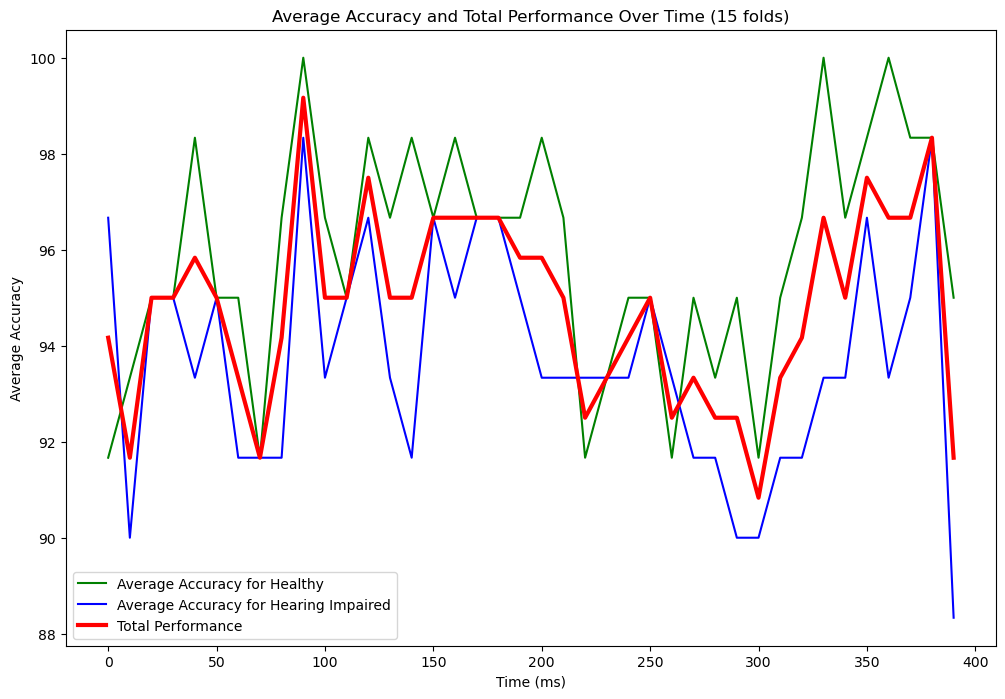

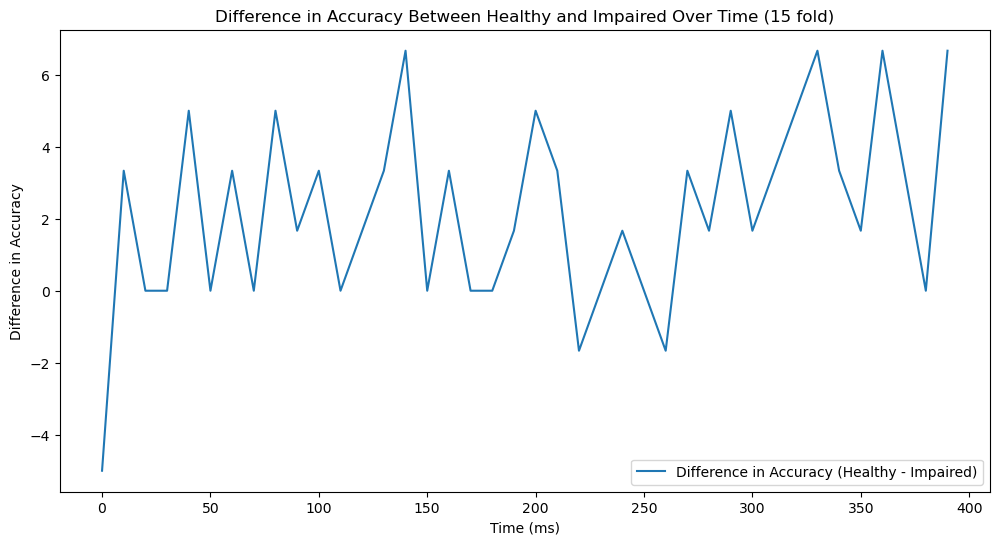

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Time': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390],
    'Fold 1 Healthy': [50,75,75,75,100,75,75,0,75,100,50,75,100,75,75,75,100,75,75,75,75,75,75,75,75,75,25,75,50,50,25,50,75,100,75,75,100,75,100,100],
    'Fold 1 Impaired': [75,75,50,50,25,50,25,50,50,75,50,50,75,50,75,50,50,100,100,100,75,75,25,50,75,100,75,25,25,25,0,25,0,50,50,50,50,50,100,50],
    'Fold 2 Healthy': [50,50,75,75,100,75,75,75,75,100,100,75,75,100,100,100,100,100,100,100,100,100,50,75,75,75,75,75,75,100,100,100,100,100,75,100,100,100,75,75],
    'Fold 2 Impaired': [100,25,100,75,100,75,75,75,75,100,100,100,100,100,75,100,75,75,50,50,50,75,100,50,50,50,50,100,75,75,75,75,75,100,100,100,100,100,100,75],
    'Fold 3 Healthy': [100,75,75,75,75,75,100,100,100,100,100,100,100,75,100,75,75,75,75,75,100,75,75,50,75,75,75,75,75,100,75,75,75,100,100,100,100,100,100,75],
    'Fold 3 Impaired': [75,75,100,100,75,100,75,75,75,100,100,100,75,50,50,100,100,75,100,75,75,100,75,100,75,75,75,75,75,100,100,75,100,50,50,100,100,100,75,50],
    'Fold 4 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100],
    'Fold 4 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 5 Healthy': [75,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,75],
    'Fold 5 Impaired': [100,75,75,100,100,100,100,100,75,100,75,100,100,100,75,100,100,100,100,100,100,75,100,100,100,100,100,100,100,75,75,100,100,100,100,100,100,75,100,100],
    'Fold 6 Healthy': [100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 6 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 7 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 7 Impaired': [100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,75,100,75,100,100,100,100,100,100,75,100,100,75],
    'Fold 8 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 8 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 9 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 9 Impaired': [100,100,100,100,100,100,100,100,100,100,75,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,75],
    'Fold 10 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 10 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 11 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 11 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 12 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 12 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 13 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 13 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 14 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 14 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 15 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 15 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]
}

df = pd.DataFrame(data)


# Plotting the top three plots together
plt.figure(figsize=(12, 8))

# Plot Average Accuracy for Healthy
df_healthy = df.filter(like='Healthy').mean(axis=1)
plt.plot(df['Time'], df_healthy, label='Average Accuracy for Healthy', color='green')
# print(df_healthy.to_frame().T.to_string(index=False))

# Calculate the overall average of Healthy accuracy across all time points
df_healthy_avg = df.filter(like='Healthy').mean(axis=1) / 100  # Divide by 100
average_accuracy_healthy = df_healthy_avg.mean()
print(f'Overall Average Accuracy for Healthy: {average_accuracy_healthy:.2%}')

# Plot Average Accuracy for Impaired
df_impaired = df.filter(like='Impaired').mean(axis=1)
plt.plot(df['Time'], df_impaired, label='Average Accuracy for Hearing Impaired', color='blue')
# print(df_impaired.to_frame().T.to_string(index=False))

# Calculate the overall average of Impaired accuracy across all time points
df_impaired_avg = df.filter(like='Impaired').mean(axis=1) /100
average_accuracy_impaired = df_impaired_avg.mean()
print(f'Overall Average Accuracy for Hearing Impaired: {average_accuracy_impaired:.2%}')

# Calculate the difference between Healthy and Impaired at each time point
df_difference = df_healthy - df_impaired
print(df_difference.to_frame().T.to_string(index=False, col_space=7))
# Plot Total Performance
df_total = df.iloc[:, 1:].mean(axis=1)
plt.plot(df['Time'], df_total, label='Total Performance', color='red', linewidth=3)

# Set y-axis limits for the top three plots
# plt.ylim(60, 110)

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy and Total Performance Over Time (15 folds)')
plt.legend()

# Show the top three plots
plt.show()




# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df_difference, label='Difference in Accuracy (Healthy - Impaired)')
# plt.ylim(60, 110)  # Set y-axis limits

plt.xlabel('Time (ms)')
plt.ylabel('Difference in Accuracy')
plt.title('Difference in Accuracy Between Healthy and Impaired Over Time (15 fold)')
plt.legend()

# Display the plot
plt.show()


Plots for all folds (10 fold WITH ALL SUBJECTS)

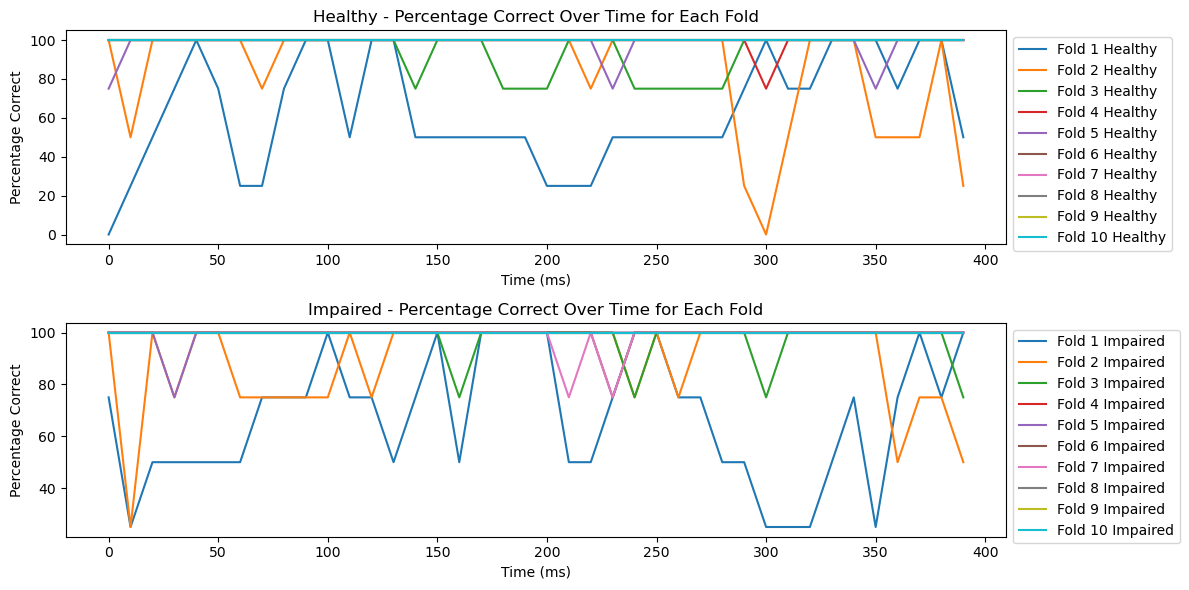

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Time': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390],
    'Fold 1 Healthy': [0,25,50,75,100,75,25,25,75,100,100,50,100,100,50,50,50,50,50,50,25,25,25,50,50,50,50,50,50,75,100,75,75,100,100,100,75,100,100,50],
    'Fold 1 Impaired': [75,25,50,50,50,50,50,75,75,75,100,75,75,50,75,100,50,100,100,100,100,50,50,75,100,100,75,75,50,50,25,25,25,50,75,25,75,100,75,100],
    'Fold 2 Healthy': [100,50,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,25,0,50,100,100,100,50,50,50,100,25],
    'Fold 2 Impaired': [100,25,100,75,100,100,75,75,75,75,75,100,75,100,100,100,100,100,100,100,100,100,100,100,75,100,75,100,100,100,100,100,100,100,100,100,50,75,75,50],
    'Fold 3 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,75,75,75,100,100,100,75,75,75,75,75,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 3 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,75,100,100,100,100,100,75,100,100,100,100,100,100,100,100,75],
    'Fold 4 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100],
    'Fold 4 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 5 Healthy': [75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100],
    'Fold 5 Impaired':[100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 6 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 6 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 7 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 7 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 8 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 8 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 9 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 9 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 10 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 10 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Healthy
plt.subplot(2, 1, 1)
for i in range(1, 11):
    plt.plot(df['Time'], df[f'Fold {i} Healthy'], label=f'Fold {i} Healthy')

plt.xlabel('Time (ms)')
plt.ylabel('Percentage Correct')
plt.title('Healthy - Percentage Correct Over Time for Each Fold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside

# Plot for Impaired
plt.subplot(2, 1, 2)
for i in range(1, 11):
    plt.plot(df['Time'], df[f'Fold {i} Impaired'], label=f'Fold {i} Impaired')

plt.xlabel('Time (ms)')
plt.ylabel('Percentage Correct')
plt.title('Impaired - Percentage Correct Over Time for Each Fold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

Plots for 10 folds which includes average accuracy for each class and their total performance over time

0      87.5
1      87.5
2      95.0
3      97.5
4     100.0
5      97.5
6      92.5
7      90.0
8      97.5
9     100.0
10    100.0
11     95.0
12    100.0
13    100.0
14     92.5
15     95.0
16     95.0
17     95.0
18     92.5
19     92.5
20     90.0
21     92.5
22     90.0
23     92.5
24     92.5
25     92.5
26     92.5
27     92.5
28     92.5
29     90.0
30     87.5
31     92.5
32     97.5
33    100.0
34    100.0
35     92.5
36     92.5
37     95.0
38    100.0
39     87.5
dtype: float64
Overall Average Accuracy for Healthy: 94.12%
Overall Average Accuracy for Hearing Impaired: 95.12%
Overall Average Total Performance: 94.62%


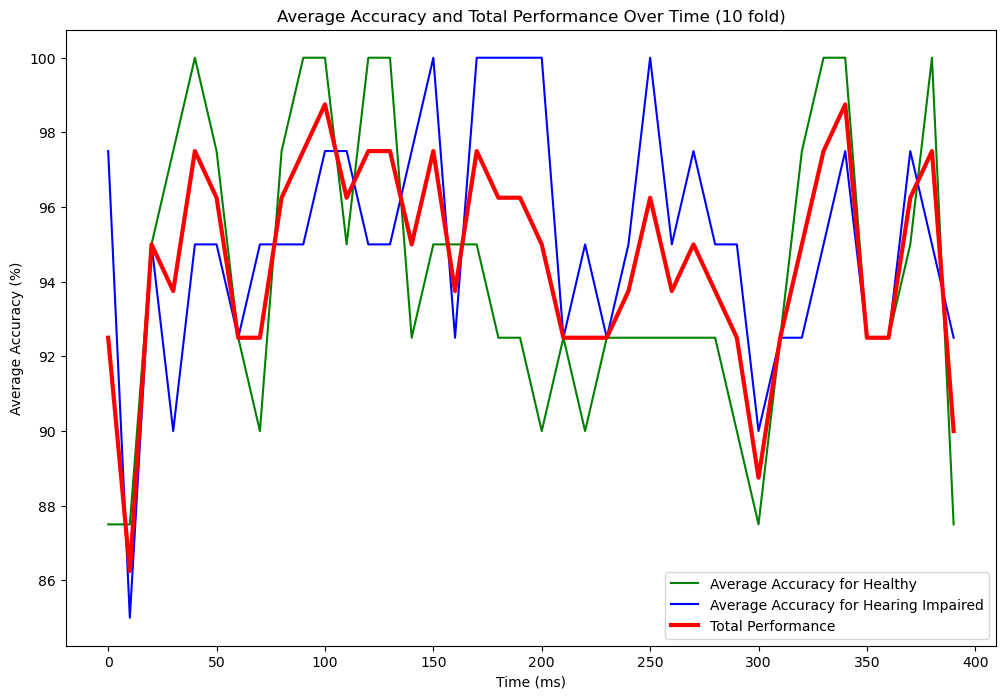

Differences Array:
Differences Array:
Differences Array:
[-10.    2.5   0.    7.5   5.    2.5   0.   -5.    2.5   5.    2.5  -2.5
   5.    5.   -5.   -5.    2.5  -5.   -7.5  -7.5 -10.    0.   -5.    0.
  -2.5  -7.5  -2.5  -5.   -2.5  -5.   -2.5   0.    5.    5.    2.5   0.
   0.   -2.5   5.   -5. ]


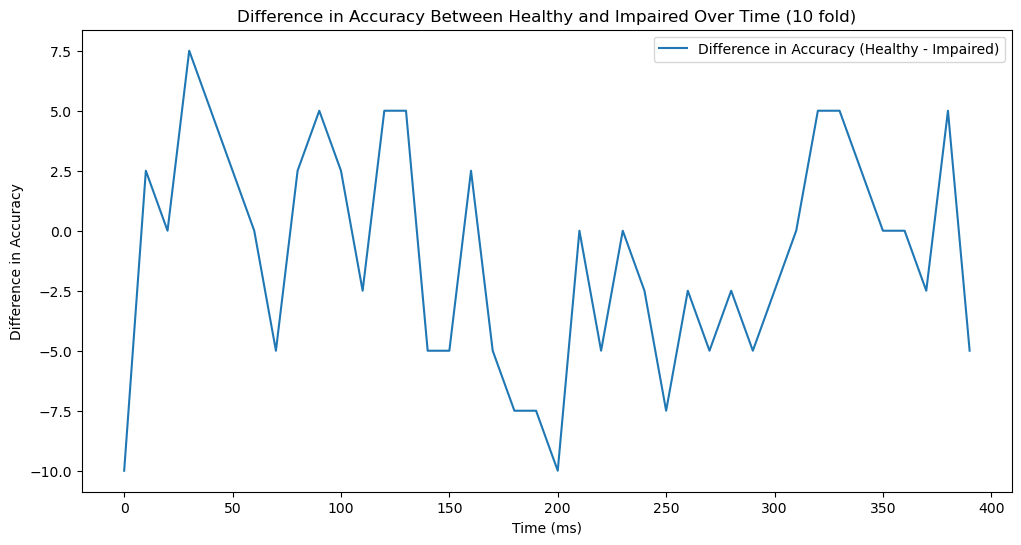

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Time': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390],
    'Fold 1 Healthy': [0,25,50,75,100,75,25,25,75,100,100,50,100,100,50,50,50,50,50,50,25,25,25,50,50,50,50,50,50,75,100,75,75,100,100,100,75,100,100,50],
    'Fold 1 Impaired': [75,25,50,50,50,50,50,75,75,75,100,75,75,50,75,100,50,100,100,100,100,50,50,75,100,100,75,75,50,50,25,25,25,50,75,25,75,100,75,100],
    'Fold 2 Healthy': [100,50,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,25,0,50,100,100,100,50,50,50,100,25],
    'Fold 2 Impaired': [100,25,100,75,100,100,75,75,75,75,75,100,75,100,100,100,100,100,100,100,100,100,100,100,75,100,75,100,100,100,100,100,100,100,100,100,50,75,75,50],
    'Fold 3 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,75,75,75,100,100,100,75,75,75,75,75,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 3 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,75,100,100,100,100,100,75,100,100,100,100,100,100,100,100,75],
    'Fold 4 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100],
    'Fold 4 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 5 Healthy': [75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100],
    'Fold 5 Impaired':[100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 6 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 6 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 7 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 7 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,75,100,75,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 8 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 8 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 9 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 9 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 10 Healthy': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100],
    'Fold 10 Impaired': [100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100]
}

df = pd.DataFrame(data)

# Plotting the top three plots together
plt.figure(figsize=(12, 8))

# Plot Average Accuracy for Healthy
df_healthy = df.filter(like='Healthy').mean(axis=1)
print(df_healthy)
plt.plot(df['Time'], df_healthy, label='Average Accuracy for Healthy', color='green')
# print(df_healthy.to_frame().T.to_string(index=False))

# Calculate the overall average of Healthy accuracy across all time points
df_healthy_avg = df.filter(like='Healthy').mean(axis=1) / 100  # Divide by 100
average_accuracy_healthy = df_healthy_avg.mean()
print(f'Overall Average Accuracy for Healthy: {average_accuracy_healthy:.2%}')

# Plot Average Accuracy for Impaired
df_impaired = df.filter(like='Impaired').mean(axis=1)
plt.plot(df['Time'], df_impaired, label='Average Accuracy for Hearing Impaired', color='blue')
# print(df_impaired.to_frame().T.to_string(index=False))

# Calculate the overall average of Impaired accuracy across all time points
df_impaired_avg = df.filter(like='Impaired').mean(axis=1) /100
average_accuracy_impaired = df_impaired_avg.mean()
print(f'Overall Average Accuracy for Hearing Impaired: {average_accuracy_impaired:.2%}')

# Calculate the difference between Healthy and Impaired at each time point
df_difference = df_healthy - df_impaired
# print(df_difference.to_frame().T.to_string(index=False))


# Plot Total Performance
df_total = df.iloc[:, 1:].mean(axis=1)
plt.plot(df['Time'], df_total, label='Total Performance', color='red', linewidth=3)

# Calculate the overall average of Total Performance across all time points
df_total_avg = df.iloc[:, 1:].mean(axis=1) / 100  # Divide by 100
average_accuracy_total = df_total_avg.mean()
print(f'Overall Average Total Performance: {average_accuracy_total:.2%}')

# Set y-axis limits for the top three plots
# plt.ylim(60, 110)

# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy and Total Performance Over Time (10 fold)')
plt.legend()

# Show the top three plots
plt.show()


# Store the differences in a NumPy array
differences_array = df_difference.to_numpy()


# DataFrame directly from the NumPy array
differences_df = pd.DataFrame(differences_array, columns=['Difference'], index=df_difference.index)
# Print the differences array
print("Differences Array:")
# print(tabulate(differences_df, headers='keys', tablefmt='pretty'))

# Print the differences array using to_string
print("Differences Array:")
# print(differences_df.to_string())

# Print the differences array
print("Differences Array:")
print(differences_array)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df_difference, label='Difference in Accuracy (Healthy - Impaired)')
# plt.ylim(60, 110)  # Set y-axis limits

plt.xlabel('Time (ms)')
plt.ylabel('Difference in Accuracy')
plt.title('Difference in Accuracy Between Healthy and Impaired Over Time (10 fold)')
plt.legend()

# Display the plot
plt.show()

# Plot Average Accuracy for Healthy
df_healthy = df.filter(like='Healthy').mean(axis=1)
healthy_string = df_healthy.to_frame().T.to_string(index=False, col_space=7)

# Plot Average Accuracy for Impaired
df_impaired = df.filter(like='Impaired').mean(axis=1)
impaired_string = df_impaired.to_frame().T.to_string(index=False, col_space=7)

# Calculate the difference between Healthy and Impaired at each time point
df_difference = df_healthy - df_impaired
difference_string = df_difference.to_frame().T.to_string(index=False, col_space=7)

# Save the strings to a text file
with open('output10Fold.txt', 'w') as f:
    f.write(healthy_string + '\n\n' + impaired_string + '\n\n' + difference_string)

10 fold (including all subjects): calculate the percentage accuracy for each subject by counting the number of correct predictions and dividing it by the total number of images for that subject

In [70]:
import os

# Function to parse a line and extract information
def parse_line(line, line_number):
    try:
        parts = line.strip().split()
        image_name = parts[0]
        true_label = int(parts[1])
        predicted_label = float(parts[2])  # Use float instead of int for predicted label
        subject_number = int(image_name.split('_')[-1].split('-')[-1].split('.')[0])
        return subject_number, image_name, true_label, predicted_label
    except ValueError as e:
        print(f"Error parsing line {line_number}: {e}")
        print(f"Line content: {line}")
        raise  # Re-raise the exception to stop the program

# Function to process a file and calculate accuracy for each subject
def process_file(file_path):
    subject_results = {}
    
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            if line.startswith('Image Name'):
                continue  # Skip header line
            subject_number, image_name, true_label, predicted_label = parse_line(line, line_number)
            
            # Initialize subject results if not already present
            if subject_number not in subject_results:
                subject_results[subject_number] = {'correct': 0, 'total': 0}
            
            # Update results based on the classification
            if true_label == predicted_label:
                subject_results[subject_number]['correct'] += 1
            subject_results[subject_number]['total'] += 1

            # Print true and predicted labels for each image
            # print(f"Image: {image_name}, True Label: {true_label}, Predicted Label: {predicted_label}")

    # Calculate and print accuracy for each subject
    print(f"\nAccuracy for each subject in {file_path}:")
    for subject, results in subject_results.items():
        accuracy = (results['correct'] / results['total']) * 100 if results['total'] > 0 else 0
        print(f"Subject {subject}: {accuracy:.2f}% ({results['correct']} out of {results['total']} images)")

# Specify the directory containing the text files
directory_path = "/home/wangg/REU-Hearing-Loss-Project-1/machine learning/finalPush/preTrained model/unfreezeLast4Layers/classification results"

# List all text files in the directory
txt_files = sorted([file for file in os.listdir(directory_path) if file.endswith('.txt')])
print(txt_files)
# Process each text file
for txt_file in txt_files:
    file_path = os.path.join(directory_path, txt_file)
    process_file(file_path)


['pretrained_unfreezeLast4Layers_classification_results_fold_1.txt', 'pretrained_unfreezeLast4Layers_classification_results_fold_10.txt', 'pretrained_unfreezeLast4Layers_classification_results_fold_2.txt', 'pretrained_unfreezeLast4Layers_classification_results_fold_3.txt', 'pretrained_unfreezeLast4Layers_classification_results_fold_4.txt', 'pretrained_unfreezeLast4Layers_classification_results_fold_5.txt', 'pretrained_unfreezeLast4Layers_classification_results_fold_6.txt', 'pretrained_unfreezeLast4Layers_classification_results_fold_7.txt', 'pretrained_unfreezeLast4Layers_classification_results_fold_8.txt', 'pretrained_unfreezeLast4Layers_classification_results_fold_9.txt']

Accuracy for each subject in /home/wangg/REU-Hearing-Loss-Project-1/machine learning/finalPush/preTrained model/unfreezeLast4Layers/classification results/pretrained_unfreezeLast4Layers_classification_results_fold_1.txt:
Subject 30: 10.00% (4 out of 40 images)
Subject 33: 25.00% (10 out of 40 images)
Subject 34: 20.

script to save the values above in a txt file

In [73]:
import os

# Function to parse a line and extract information
def parse_line(line, line_number):
    try:
        parts = line.strip().split()
        image_name = parts[0]
        true_label = int(parts[1])
        predicted_label = float(parts[2])  # Use float instead of int for predicted label
        subject_number = int(image_name.split('_')[-1].split('-')[-1].split('.')[0])
        return subject_number, image_name, true_label, predicted_label
    except ValueError as e:
        print(f"Error parsing line {line_number}: {e}")
        print(f"Line content: {line}")
        raise  # Re-raise the exception to stop the program

# Function to process a file and calculate accuracy for each subject
def process_file(file_path):
    subject_results = {}
    
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            if line.startswith('Image Name'):
                continue  # Skip header line
            subject_number, image_name, true_label, predicted_label = parse_line(line, line_number)
            
            # Initialize subject results if not already present
            if subject_number not in subject_results:
                subject_results[subject_number] = {'correct': 0, 'total': 0}
            
            # Update results based on the classification
            if true_label == predicted_label:
                subject_results[subject_number]['correct'] += 1
            subject_results[subject_number]['total'] += 1

    # Calculate accuracy for each subject
    accuracy_info = []
    for subject, results in subject_results.items():
        accuracy = (results['correct'] / results['total']) * 100 if results['total'] > 0 else 0
        accuracy_info.append(f"Subject {subject}: {accuracy:.2f}% ({results['correct']} out of {results['total']} images)")

    return accuracy_info

# Specify the directory containing the text files
directory_path = "/home/wangg/REU-Hearing-Loss-Project-1/machine learning/finalPush/preTrained model/unfreezeLast4Layers/classification results"

# List all text files in the directory
txt_files = sorted([file for file in os.listdir(directory_path) if file.endswith('.txt')])

# Process each text file and accumulate accuracy information
all_accuracy_info = []
for txt_file in txt_files:
    file_path = os.path.join(directory_path, txt_file)
    accuracy_info = process_file(file_path)
    all_accuracy_info.extend(accuracy_info)

print (all_accuracy_info)
# Write all accuracy information to a single text file
output_file_path = "all_accuracies_by_subject_10fold_freezelast4layers.txt"
with open(output_file_path, 'w') as output_file:
    output_file.write('\n'.join(all_accuracy_info))

print(f"All accuracy information written to {output_file_path}")


['Subject 30: 10.00% (4 out of 40 images)', 'Subject 33: 25.00% (10 out of 40 images)', 'Subject 34: 20.00% (8 out of 40 images)', 'Subject 35: 15.00% (6 out of 40 images)', 'Subject 6: 82.50% (33 out of 40 images)', 'Subject 12: 82.50% (33 out of 40 images)', 'Subject 18: 80.00% (32 out of 40 images)', 'Subject 20: 75.00% (30 out of 40 images)', 'Subject 22: 22.50% (9 out of 40 images)', 'Subject 23: 32.50% (13 out of 40 images)', 'Subject 27: 45.00% (18 out of 40 images)', 'Subject 31: 27.50% (11 out of 40 images)', 'Subject 1: 62.50% (25 out of 40 images)', 'Subject 2: 65.00% (26 out of 40 images)', 'Subject 19: 62.50% (25 out of 40 images)', 'Subject 42: 65.00% (26 out of 40 images)', 'Subject 21: 100.00% (40 out of 40 images)', 'Subject 32: 100.00% (40 out of 40 images)', 'Subject 37: 100.00% (40 out of 40 images)', 'Subject 39: 100.00% (40 out of 40 images)', 'Subject 2: 0.00% (0 out of 40 images)', 'Subject 4: 0.00% (0 out of 40 images)', 'Subject 11: 0.00% (0 out of 40 images)'

script to sort the accuracies by subject by subject number

In [74]:
# Read data from the file
file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/all_accuracies_by_subject_10fold_freezelast4layers.txt'  # Replace with your actual file path

with open(file_path, 'r') as file:
    data = file.read()

# Split the data into lines
lines = data.split('\n')

# Sort lines by subject number
sorted_lines = sorted(lines, key=lambda x: int(x.split(':')[0].split()[-1]))

# Save sorted lines back to the original file
with open(file_path, 'w') as file:
    file.write('\n'.join(sorted_lines))


now calculate the average for each subject

In [75]:
# Read data from the sorted file
file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/all_accuracies_by_subject_10fold_freezelast4layers.txt'  # Replace with your actual file path
with open(file_path, 'r') as file:
    data = file.read()

# Split the data into lines
lines = data.split('\n')

# Initialize a dictionary to store the sum and count for each subject
subject_data = {}

# Process each line and calculate the sum and count for each subject
for line in lines:
    if line.strip():  # Check if the line is not empty
        subject, percentage = line.split(':')
        subject = subject.strip()
        percentage = float(percentage.split('%')[0])
        
        if subject in subject_data:
            subject_data[subject]['sum'] += percentage
            subject_data[subject]['count'] += 1
        else:
            subject_data[subject] = {'sum': percentage, 'count': 1}

# Calculate and print the average for each subject
for subject, data in subject_data.items():
    average = data['sum'] / data['count']
    print(f"{subject}: {average:.2f}% ({data['count']} out of {data['count']} images)")
    


Subject 1: 71.25% (2 out of 2 images)
Subject 2: 40.00% (3 out of 3 images)
Subject 3: 50.00% (1 out of 1 images)
Subject 4: 26.67% (3 out of 3 images)
Subject 5: 53.75% (2 out of 2 images)
Subject 6: 75.00% (2 out of 2 images)
Subject 7: 75.00% (2 out of 2 images)
Subject 9: 65.00% (2 out of 2 images)
Subject 10: 85.00% (2 out of 2 images)
Subject 11: 17.50% (2 out of 2 images)
Subject 12: 82.50% (1 out of 1 images)
Subject 13: 20.00% (1 out of 1 images)
Subject 14: 82.50% (1 out of 1 images)
Subject 15: 60.00% (1 out of 1 images)
Subject 16: 100.00% (1 out of 1 images)
Subject 17: 80.00% (2 out of 2 images)
Subject 18: 90.00% (2 out of 2 images)
Subject 19: 76.25% (2 out of 2 images)
Subject 20: 64.17% (3 out of 3 images)
Subject 21: 37.50% (3 out of 3 images)
Subject 22: 15.83% (3 out of 3 images)
Subject 23: 32.50% (1 out of 1 images)
Subject 24: 32.50% (1 out of 1 images)
Subject 25: 65.00% (1 out of 1 images)
Subject 26: 35.00% (3 out of 3 images)
Subject 27: 45.00% (1 out of 1 i

Line Graph of subject's accuracies by class

[('21', 80), ('22', 32.5), ('23', 5), ('24', 67.5), ('25', 17.5), ('26', 50), ('27', 37.5), ('29', 52.5), ('30', 40.83), ('31', 22.5), ('32', 17.5), ('33', 67.5), ('34', 36.67), ('35', 42.5), ('36', 19.17), ('37', 85), ('38', 77.5), ('39', 68.75), ('40', 37.5), ('43', 20), ('44', 15)]


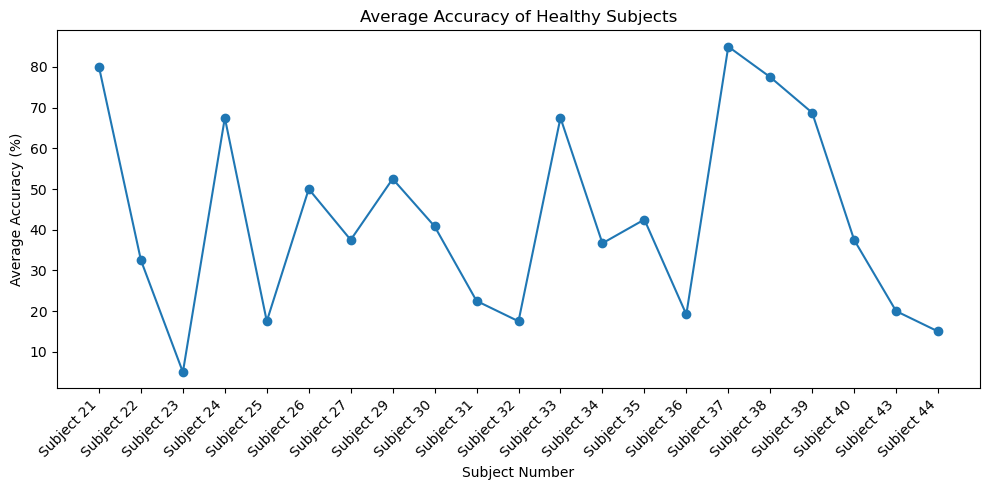

[('1', 80), ('2', 65.83), ('3', 97.5), ('4', 60.83), ('5', 57.5), ('6', 85), ('7', 86.25), ('9', 70), ('10', 55), ('11', 42.5), ('12', 100), ('13', 47.5), ('14', 15), ('15', 25), ('16', 57.5), ('17', 46.25), ('18', 81.25), ('19', 71.25), ('20', 41.67), ('41', 65), ('42', 79.38)]


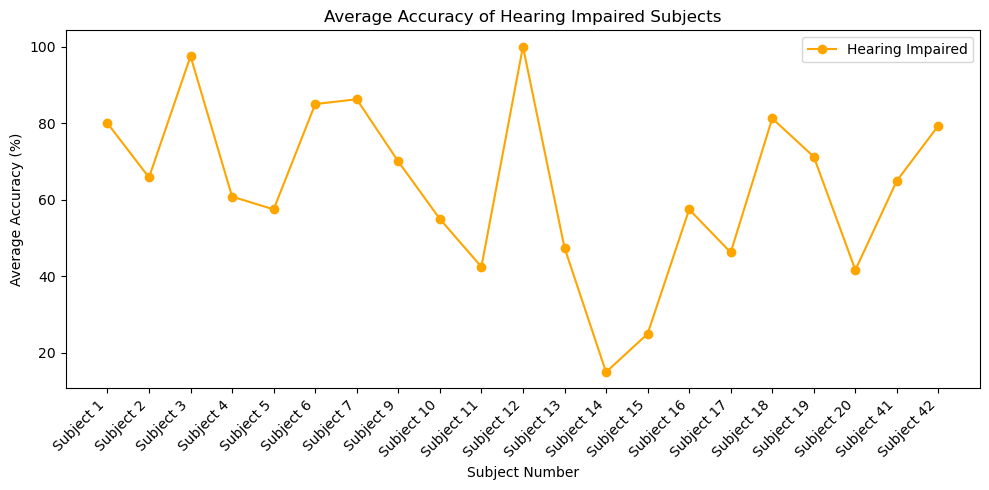

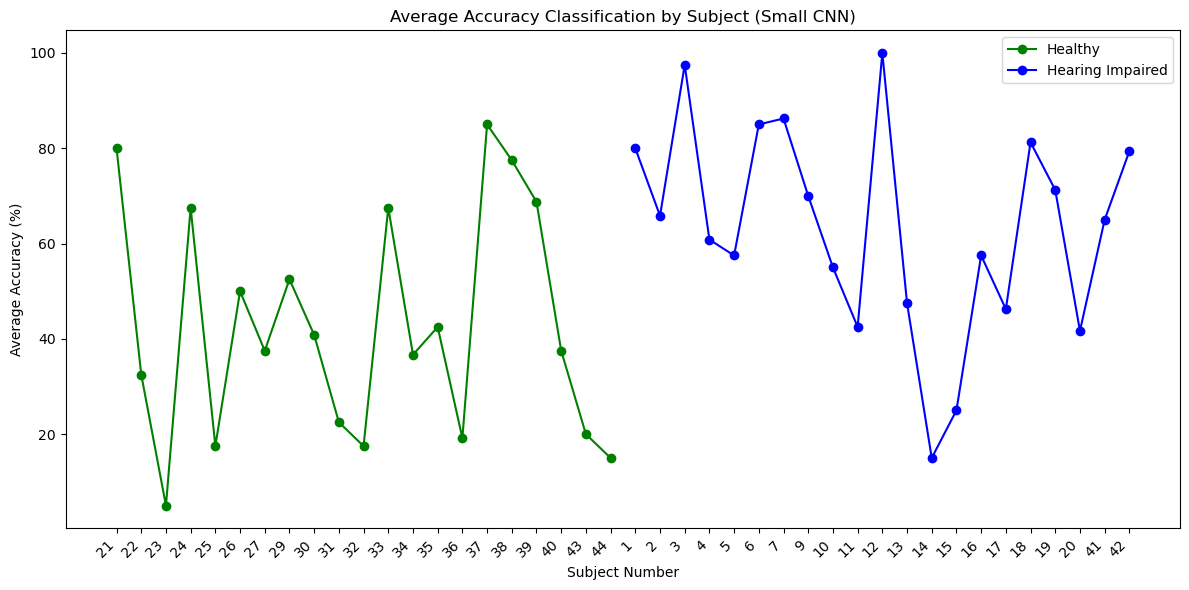

In [1]:
import matplotlib.pyplot as plt

# Your data
healthy_data = [
    ("Subject 21", 80),
    ("Subject 22", 32.5),
    ("Subject 23", 5),
    ("Subject 24", 67.5),
    ("Subject 25", 17.5),
    ("Subject 26", 50),
    ("Subject 27", 37.5),
    ("Subject 29", 52.5),
    ("Subject 30", 40.83),
    ("Subject 31", 22.5),
    ("Subject 32", 17.5),
    ("Subject 33", 67.5),
    ("Subject 34", 36.67),
    ("Subject 35", 42.5),
    ("Subject 36", 19.17),
    ("Subject 37", 85),
    ("Subject 38", 77.5),
    ("Subject 39", 68.75),
    ("Subject 40", 37.5),
    ("Subject 43", 20),
    ("Subject 44", 15)
]


# Initialize a new list to store the fixed data
healthy_data_num_fixed = []

# Iterate over each tuple in healthy_data
for subject, accuracy in healthy_data:
    # Extract the subject number (remove "Subject " from the beginning of the string)
    subject_num = subject.replace("Subject ", "")
    # Create a new tuple with the subject number as a string and the accuracy
    new_tuple = (subject_num, accuracy)
    # Append the new tuple to the fixed list
    healthy_data_num_fixed.append(new_tuple)

# Print the fixed data
print(healthy_data_num_fixed)


# Extract subject numbers and accuracies
subjects = [subject for subject, _ in healthy_data]
accuracies = [accuracy for _, accuracy in healthy_data]

# Create a line graph
plt.figure(figsize=(10, 5))
plt.plot(subjects, accuracies, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Subject Number')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy of Healthy Subjects')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Your data for hearing impaired subjects
impaired_data = [
    ("Subject 1", 80),
    ("Subject 2", 65.83),
    ("Subject 3", 97.5),
    ("Subject 4", 60.83),
    ("Subject 5", 57.5),
    ("Subject 6", 85),
    ("Subject 7", 86.25),
    ("Subject 9", 70),
    ("Subject 10", 55),
    ("Subject 11", 42.5),
    ("Subject 12", 100),
    ("Subject 13", 47.5),
    ("Subject 14", 15),
    ("Subject 15", 25),
    ("Subject 16", 57.5),
    ("Subject 17", 46.25),
    ("Subject 18", 81.25),
    ("Subject 19", 71.25),
    ("Subject 20", 41.67),
    ("Subject 41", 65),
    ("Subject 42", 79.38)
]


# Initialize a new list to store the fixed data
impaired_data_fixed = []

# Iterate over each tuple in impaired_data
for subject, accuracy in impaired_data:
    # Extract the subject number (remove "Subject " from the beginning of the string)
    subject_num = subject.replace("Subject ", "")
    # Create a new tuple with the subject number as a string and the accuracy
    new_tuple = (subject_num, accuracy)
    # Append the new tuple to the fixed list
    impaired_data_fixed.append(new_tuple)

# Print the fixed data
print(impaired_data_fixed)

# Extract subject numbers and accuracies
subjects_impaired = [subject for subject, _ in impaired_data]
accuracies_impaired = [accuracy for _, accuracy in impaired_data]

# Create a line graph for hearing impaired subjects
plt.figure(figsize=(10, 5))
plt.plot(subjects_impaired, accuracies_impaired, marker='o', linestyle='-', color='orange', label='Hearing Impaired')

# Add labels and title
plt.xlabel('Subject Number')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy of Hearing Impaired Subjects')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Extract subject numbers and accuracies
subjects_healthy = [subject for subject, _ in healthy_data]
accuracies_healthy = [accuracy for _, accuracy in healthy_data]
subjects_healthy_num = [subject for subject, _ in healthy_data_num_fixed] 

subjects_impaired = [subject for subject, _ in impaired_data]
accuracies_impaired = [accuracy for _, accuracy in impaired_data]
subjects_impaired_num = [subject for subject, _ in impaired_data_fixed]
# Create a line graph for both healthy and impaired subjects
plt.figure(figsize=(12, 6))
plt.plot(subjects_healthy_num, accuracies_healthy, marker='o', linestyle='-', color = 'green' , label='Healthy')
plt.plot(subjects_impaired_num, accuracies_impaired, marker='o', linestyle='-', color='blue', label='Hearing Impaired')

# Add labels and title
plt.xlabel('Subject Number')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy Classification by Subject (Small CNN)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

gathering accuracies for the 5 folds because I forgot to store it

In [ ]:
import os
import pickle
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

# Path to the data directories
fold_data_dir = '/home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/5folds- 80-20 train test split'

# Data generator for testing (no validation)
data_generator = ImageDataGenerator(rescale=1.0/255.0)

# Lists to store results for each fold
fold_accuracies = []
img_width, img_height = 224, 224

for fold_number in range(1, 6):
 # Load the saved model for testing
    loaded_model = load_model(f'/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/5 folds 80_20 split/model/model_fold_{fold_number}.h5')

    # Update fold path 
    fold_path = os.path.join(fold_data_dir, f'fold{fold_number}')

    # Testing data
    test_data_dir = os.path.join(fold_path, 'Testing')
    print(f"\nFold {fold_number} - Testing Data Directory:", test_data_dir)

    test_generator = data_generator.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

    print("Number of Test Samples:", test_generator.samples)

    # Evaluate the model on test data
    test_loss, test_accuracy = loaded_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
    print(f'\nEvaluation for Fold {fold_number}:')
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    # Store the accuracy for this fold
    fold_accuracies.append(test_accuracy)

# Save the accuracies to a file
with open('5folds_fold_accuracies.pkl', 'wb') as file:
    pickle.dump(fold_accuracies, file)


2024-01-14 18:40:18.328288: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-14 18:40:21.320981: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.



Fold 1 - Testing Data Directory: /home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/5folds- 80-20 train test split/fold1/Testing
Found 320 images belonging to 2 classes.
Number of Test Samples: 320


2024-01-14 18:40:25.290099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 309ms/step - loss: 2.1283 - accuracy: 0.6375

Evaluation for Fold 1:
Test Loss: 2.1282992362976074
Test Accuracy: 0.637499988079071

Fold 2 - Testing Data Directory: /home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/5folds- 80-20 train test split/fold2/Testing
Found 320 images belonging to 2 classes.
Number of Test Samples: 320


2024-01-14 18:40:35.895373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 326ms/step - loss: 0.9262 - accuracy: 0.8281

Evaluation for Fold 2:
Test Loss: 0.9262250661849976
Test Accuracy: 0.828125

Fold 3 - Testing Data Directory: /home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/5folds- 80-20 train test split/fold3/Testing
Found 320 images belonging to 2 classes.
Number of Test Samples: 320


2024-01-14 18:40:46.314989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 271ms/step - loss: 0.5716 - accuracy: 0.8375

Evaluation for Fold 3:
Test Loss: 0.5715558528900146
Test Accuracy: 0.8374999761581421

Fold 4 - Testing Data Directory: /home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/5folds- 80-20 train test split/fold4/Testing
Found 320 images belonging to 2 classes.
Number of Test Samples: 320


2024-01-14 18:40:57.411759: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 261ms/step - loss: 0.0249 - accuracy: 0.9969

Evaluation for Fold 4:
Test Loss: 0.024907058104872704
Test Accuracy: 0.996874988079071

Fold 5 - Testing Data Directory: /home/wangg/REU-Hearing-Loss-Project/machine learning/allFolds/5folds- 80-20 train test split/fold5/Testing
Found 320 images belonging to 2 classes.
Number of Test Samples: 320


2024-01-14 18:41:06.299604: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 316ms/step - loss: 0.1731 - accuracy: 0.9563

Evaluation for Fold 5:
Test Loss: 0.17311403155326843
Test Accuracy: 0.956250011920929


printing the accuracies

In [1]:
import pickle

# Specify the file path
file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/finalPush/10Fold/model/evaluation_results_10FOLD100EPOCHS.pkl'

# Open the file in binary mode for reading
with open(file_path, 'rb') as file:
    # Load the pickled data
    accuracies = pickle.load(file)

# Now, 'accuracies' variable contains the data from the pickle file
print("Accuracies:", accuracies)


Accuracies: {'precision_list': [0.5666666666666667, 0.6575342465753424, 0.6139534883720931, 0.5449101796407185, 0.5147058823529411, 0.4444444444444444, 0.5079365079365079, 0.45408163265306123, 0.5663265306122449, 0.5197132616487455], 'recall_list': [0.74375, 0.6, 0.825, 0.56875, 0.65625, 0.3, 0.6, 0.55625, 0.69375, 0.90625], 'f1_list': [0.6432432432432432, 0.6274509803921569, 0.704, 0.5565749235474006, 0.576923076923077, 0.3582089552238806, 0.5501432664756446, 0.5, 0.6235955056179775, 0.6605922551252847]}


printing precision recall and f1

Length of Precision List: 10
Length of Recall List: 10
Length of F1 List: 10
Length of Precision Combined List: 10
Length of Recall Combined List: 10
Length of F1 Score Combined List: 10


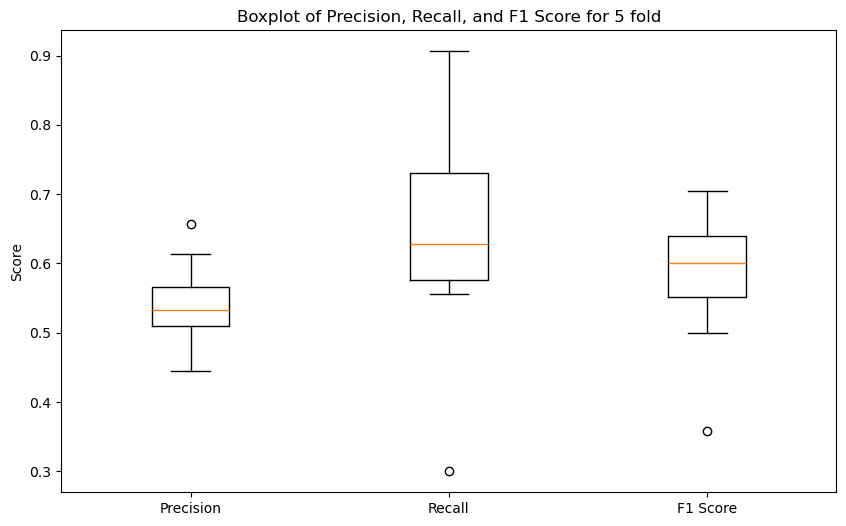

ValueError: All arrays must be of the same length

In [2]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the file path
file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/finalPush/10Fold/model/evaluation_results_10FOLD100EPOCHS.pkl'

# Load the results from the file
with open(file_path, 'rb') as file:
    loaded_results = pickle.load(file)

# Access individual lists
precision_list_loaded = loaded_results['precision_list']
recall_list_loaded = loaded_results['recall_list']
f1_list_loaded = loaded_results['f1_list']

# Print the lengths of the loaded lists
print("Length of Precision List:", len(precision_list_loaded))
print("Length of Recall List:", len(recall_list_loaded))
print("Length of F1 List:", len(f1_list_loaded))

# Combine the lists into a single list of lists
data = [precision_list_loaded, recall_list_loaded, f1_list_loaded]

# Print the lengths of the combined lists
for i, metric_data in enumerate(data, 1):
    print(f"Length of {['Precision', 'Recall', 'F1 Score'][i-1]} Combined List:", len(metric_data))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplot
bp = ax.boxplot(data, labels=['Precision', 'Recall', 'F1 Score'])

# Set labels and title
ax.set_ylabel('Score')
ax.set_title('Boxplot of Precision, Recall, and F1 Score for 5 fold')

# Show the plot
plt.show()

# Create a DataFrame for easy summary and visualization
df_results = pd.DataFrame({
    'Fold': range(1, 6),
    'Metric': ['Precision'] * 5 + ['Recall'] * 5 + ['F1 Score'] * 5,
    'Score': precision_list_loaded + recall_list_loaded + f1_list_loaded
})

# Visualize the results with a single boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Metric', y='Score', data=df_results)
plt.title('Performance Across 5-Folds')
plt.show()

# Summary table
summary_table = df_results.groupby('Metric')['Score'].describe()[['min', 'mean', 'max']]
summary_table.columns = ['Worst Fold', 'Avg. Fold', 'Best Fold']
print("\nSummary of Results:")
print(summary_table)


Calculate the average accuracies of all folds

In [3]:
import matplotlib.pyplot as plt

# 10 folds accuracies
fold_accuracies = [ 0.5874999762, 0.6437500119, 0.6531249881, 0.546875, 0.5187500119, 0.462500006, 0.5093749762, 0.443749994, 0.5812500119, 0.5343750119]

# Calculate the average accuracy for 10 folds
average_fold_accuracy = sum(fold_accuracies) / len(fold_accuracies)

# Print the result
print(f"Average Accuracy for 10 Folds: {average_fold_accuracy}")


Average Accuracy for 10 Folds: 0.54812499881


calculate the percentage accuracy for each subject by counting the number of correct predictions and dividing it by the total number of images for that subject

In [133]:
import os

# Function to parse a line and extract information
def parse_line(line, line_number):
    try:
        parts = line.strip().split()
        image_name = parts[0]
        true_label = int(parts[1])
        predicted_label = float(parts[2])  # Use float instead of int for predicted label
        subject_number = int(image_name.split('_')[-1].split('-')[-1].split('.')[0])
        return subject_number, image_name, true_label, predicted_label
    except ValueError as e:
        print(f"Error parsing line {line_number}: {e}")
        print(f"Line content: {line}")
        raise  # Re-raise the exception to stop the program

# Function to process a file and calculate accuracy for each subject
def process_file(file_path):
    subject_results = {}
    
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            if line.startswith('Image Name'):
                continue  # Skip header line
            subject_number, image_name, true_label, predicted_label = parse_line(line, line_number)
            
            # Initialize subject results if not already present
            if subject_number not in subject_results:
                subject_results[subject_number] = {'correct': 0, 'total': 0}
            
            # Update results based on the classification
            if true_label == predicted_label:
                subject_results[subject_number]['correct'] += 1
            subject_results[subject_number]['total'] += 1

            # Print true and predicted labels for each image
            # print(f"Image: {image_name}, True Label: {true_label}, Predicted Label: {predicted_label}")

    # Calculate and print accuracy for each subject
    print(f"\nAccuracy for each subject in {file_path}:")
    for subject, results in subject_results.items():
        accuracy = (results['correct'] / results['total']) * 100 if results['total'] > 0 else 0
        print(f"Subject {subject}: {accuracy:.2f}% ({results['correct']} out of {results['total']} images)")

# Specify the directory containing the text files
directory_path = "/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/10 folds 80_20 split/independentModel/classification results"

# List all text files in the directory
txt_files = sorted([file for file in os.listdir(directory_path) if file.endswith('.txt')])
print(txt_files)
# Process each text file
for txt_file in txt_files:
    file_path = os.path.join(directory_path, txt_file)
    process_file(file_path)


['10fold_classification_results_fold_1.txt', '10fold_classification_results_fold_10.txt', '10fold_classification_results_fold_2.txt', '10fold_classification_results_fold_3.txt', '10fold_classification_results_fold_4.txt', '10fold_classification_results_fold_5.txt', '10fold_classification_results_fold_6.txt', '10fold_classification_results_fold_7.txt', '10fold_classification_results_fold_8.txt', '10fold_classification_results_fold_9.txt', 'output10Fold.txt']

Accuracy for each subject in /home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/10 folds 80_20 split/independentModel/classification results/10fold_classification_results_fold_1.txt:
Subject 30: 77.50% (31 out of 40 images)
Subject 33: 30.00% (12 out of 40 images)
Subject 34: 30.00% (12 out of 40 images)
Subject 35: 65.00% (26 out of 40 images)
Subject 4: 35.00% (14 out of 40 images)
Subject 12: 97.50% (39 out of 40 images)
Subject 18: 92.50% (37 out of 40 images)
Subject 20: 90.00% (36 out of 40 images)

Ac

ValueError: invalid literal for int() with base 10: '90.0'

Getting classification results from specific fold and specific model

In [85]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_fscore_support
import pickle
from keras.models import load_model

fold_number_to_evaluate = 3  # Change this to the desired fold number

# Path to the data directories
fold_data_dir = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/allFolds/10folds - 80-20 train test split (includes all subjects)'
fold_path = os.path.join(fold_data_dir, f'fold{fold_number_to_evaluate}')

# Dimensions of the images (224x224 with 3 channels)
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

# Data generator for testing (no validation during testing)
data_generator = ImageDataGenerator(rescale=1.0/255.0)

# Lists to store results for each fold
fold_accuracies = []
precision_list = []
recall_list = []
f1_list = []

# Testing data generator
test_data_dir = os.path.join(fold_path, 'Testing')
print(f"\nFold {fold_number_to_evaluate} - Testing Data Directory:", test_data_dir)

test_generator = data_generator.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

print("Number of Test Samples:", test_generator.samples)

# Load the saved model for testing
model_filename = f'10fold_model_fold_{fold_number_to_evaluate}.h5'
model_path = os.path.join('/home/wangg/REU-Hearing-Loss-Project-1/machine learning/checkpoint results/10folds - 80-20 train test split (includes all subjects)/model', model_filename)
loaded_model = load_model(model_path)

# Evaluate the model on test data
test_loss, test_accuracy = loaded_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'\nEvaluation for Fold {fold_number_to_evaluate}:')
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Evaluate precision, recall, and F1 score
predictions = loaded_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)
true_labels = np.argmax(test_generator.labels, axis=1) if len(test_generator.labels.shape) > 1 else test_generator.labels
predicted_labels = np.argmax(predictions, axis=1)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='binary')

# Print and store the results for this fold
print(f'Precision for Fold {fold_number_to_evaluate}:', precision)
print(f'Recall for Fold {fold_number_to_evaluate}:', recall)
print(f'F1 Score for Fold {fold_number_to_evaluate}:', f1)

# Save classification results to a file
results_filename = f'10fold_classification_results_fold_{fold_number_to_evaluate}.txt'
with open(results_filename, 'w') as results_file:
    results_file.write("Image Name\tTrue Label\tPredicted Label\n")
    for i in range(len(test_generator.filenames)):
        image_name = os.path.basename(test_generator.filenames[i])
        true_label = true_labels[i]
        predicted_label = predicted_labels[i]
        results_file.write(f"{image_name}\t{true_label}\t{predicted_label}\n")



Fold 3 - Testing Data Directory: /home/wangg/REU-Hearing-Loss-Project-1/machine learning/allFolds/10folds - 80-20 train test split (includes all subjects)/fold3/Testing
Found 320 images belonging to 2 classes.


Number of Test Samples: 320


2024-01-17 12:49:50.350485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 1s 109ms/step - loss: 0.1507 - accuracy: 0.9594

Evaluation for Fold 3:
Test Loss: 0.1507255733013153
Test Accuracy: 0.9593750238418579


2024-01-17 12:49:51.861899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 1s 120ms/step
Precision for Fold 3: 0.9454545454545454
Recall for Fold 3: 0.975
F1 Score for Fold 3: 0.96


Script to replace info of the evalulation results before creating boxplots and summary tables

In [4]:
import pickle

# Specify the new file path
new_file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/finalPush/10Fold/model/evaluation_results_10FOLD100EPOCHS.pkl'

accuracies = [0.58125, 0.5375, 0.5375, 0.475, 0.54375, 0.603125, 0.64375, 0.428125, 0.54375, 0.5375]

precision_list_loaded = [0.5141068594604127, 0.44666666666666666, 0.4809523809523809, 0.4784133837021047, 0.48493692336659766, 0.5156256103754052, 0.5317460317460317, 0.4716880972041996, 0.5125019534302234, 0.5436363636363637]

recall_list_loaded = [0.5125, 0.45, 0.48125, 0.48125, 0.4875, 0.515625, 0.53125, 0.471875, 0.5125, 0.5375]

f1_list_loaded = [0.4982107675606128, 0.4412698412698413, 0.4792156862745098, 0.46362938729350944, 0.4647301211700869, 0.5156202697291965, 0.5294117647058824, 0.47100194657197914, 0.5124809562873549, 0.5206477732793523]
# Save the modified lists back to the file
results = {
    'precision_list': precision_list_loaded,
    'recall_list': recall_list_loaded,
    'f1_list': f1_list_loaded,
    'accuracies': accuracies
}

with open(new_file_path, 'wb') as file:
    pickle.dump(results, file)

# Now the new values are permanently saved in the specified file path


In [5]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the file path
file_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/finalPush/10Fold/model/evaluation_results_10FOLD100EPOCHS.pkl'

# Load the results from the file
with open(file_path, 'rb') as file:
    loaded_results = pickle.load(file)
# Access individual lists
precision_list_loaded = loaded_results['precision_list']
recall_list_loaded = loaded_results['recall_list']
f1_list_loaded = loaded_results['f1_list']
accuracies_loaded = loaded_results['accuracies']

# Print the actual values of the loaded lists
print("Precision List:", precision_list_loaded)
print("Recall List:", recall_list_loaded)
print("F1 List:", f1_list_loaded)
print("Accuracies:", accuracies_loaded)

Precision List: [0.5666666666666667, 0.6575342465753424, 0.6139534883720931, 0.5449101796407185, 0.5147058823529411, 0.4444444444444444, 0.5079365079365079, 0.45408163265306123, 0.5663265306122449, 0.5197132616487455]
Recall List: [0.74375, 0.6, 0.825, 0.56875, 0.65625, 0.3, 0.6, 0.55625, 0.69375, 0.90625]
F1 List: [0.6432432432432432, 0.6274509803921569, 0.704, 0.5565749235474006, 0.576923076923077, 0.3582089552238806, 0.5501432664756446, 0.5, 0.6235955056179775, 0.6605922551252847]
Accuracies: [0.5874999762, 0.6437500119, 0.6531249881, 0.546875, 0.5187500119, 0.462500006, 0.5093749762, 0.443749994, 0.5812500119, 0.5343750119]


Script to create boxplot

Length of Accuracy Combined List: 10
Length of Precision Combined List: 10
Length of Recall Combined List: 10
Length of F1 Score Combined List: 10

Average Precision: 0.4862
Average Recall: 0.4994
Average F1 Score: 0.4442


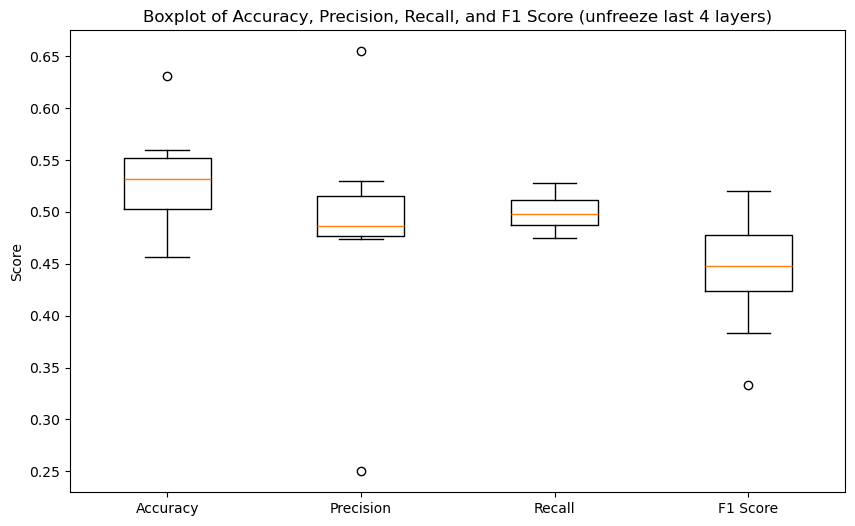

In [78]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Updated values
# Access individual lists
accuracies = [0.53125, 0.5, 0.45625001192092896, 0.5531250238418579, 0.512499988079071, 0.546875, 0.6312500238418579, 0.46562498807907104, 0.53125, 0.559374988079071]

precision_list_loaded= [0.47948717948717956, 0.25, 0.4742101869761445, 0.5301015928759563, 0.5166666666666666, 0.4935353535353535, 0.4783549783549784, 0.5094581280788177, 0.6548387096774194, 0.47565111526588116]

recall_list_loaded= [0.4875, 0.5, 0.475, 0.528125, 0.5125, 0.496875, 0.4875, 0.509375, 0.51875, 0.478125]

f1_list_loaded= [0.4320346320346321, 0.3333333333333333, 0.4709494567784601, 0.5202494067653571, 0.48, 0.4222596019063639, 0.426974143955276, 0.508294592610717, 0.3832290362953692, 0.46452369262217064]

# Combine the lists into a single list of lists, rearrange the order
data = [accuracies, precision_list_loaded, recall_list_loaded, f1_list_loaded]

# Print the lengths of the combined lists
for i, metric_data in enumerate(data, 1):
    print(f"Length of {['Accuracy', 'Precision', 'Recall', 'F1 Score'][i-1]} Combined List:", len(metric_data))
# Calculate and print the average scores
average_precision = sum(precision_list_loaded) / len(precision_list_loaded)
average_recall = sum(recall_list_loaded) / len(recall_list_loaded)
average_f1 = sum(f1_list_loaded) / len(f1_list_loaded)

print(f"\nAverage Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1 Score: {average_f1:.4f}")

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplot
bp = ax.boxplot(data, labels=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Set labels and title
ax.set_ylabel('Score')
ax.set_title('Boxplot of Accuracy, Precision, Recall, and F1 Score (unfreeze last 4 layers)')

# Show the plot
plt.show()


In [2]:
# Your fold values
fold_values = [
    0.6312500238418579,
    0.925000011920929,
    0.8968750238418579,
    0.8500000238418579,
    0.949999988079071,
    0.996874988079071,
    1.0,
    0.996874988079071,
    0.996874988079071,
    1.0
]

# Calculate the average
average_value = sum(fold_values) / len(fold_values)

# Print the result
print(f"The average value is: {average_value:.4f}")


The average value is: 0.9244


In [4]:
import os

if 'TMUX' in os.environ:
    print("Code is running within a tmux session.")
else:
    print("Code is not running within a tmux session.")


Code is not running within a tmux session.


Working on adding data augmentation  to k fold

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_fscore_support
import pickle
from keras.models import load_model
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.optimizers import Adam


# Path to the data directories
fold_data_dir = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/allFolds/10folds - 80-20 train test split (includes all subjects)'

# CNN Model
def build_model(input_shape, learning_rate = 0.001):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# # CNN Model
# def build_model(input_shape, learning_rate = 0.001):
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(256, activation='relu'))  # Reduced dense layer size
#     model.add(Dropout(0.6))  # Increased dropout rate
#     model.add(Dense(2, activation='softmax'))
#     optimizer = Adam(learning_rate=learning_rate)
#     model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
#     return model

# Dimensions of the images (224x224 with 3 channels)
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

# Data generator for training and testing (with augmentation for training)
train_data_generator = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_data_generator = ImageDataGenerator(rescale=1.0/255.0)

# Lists to store results for each fold
fold_accuracies = []
precision_list = []
recall_list = []
f1_list = []

for fold_number in range(1, 11):
    # Create the CNN model
    model = build_model(input_shape, learning_rate=0.001)
    model.summary()
    # Update fold path 
    fold_path = os.path.join(fold_data_dir, f'fold{fold_number}')

    # Training data
    train_data_dir = os.path.join(fold_path, 'Training')
    print(f"\nFold {fold_number} - Training Data Directory:", train_data_dir)
    
    train_generator = train_data_generator.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical'
    )
    print("Number of Training Samples:", train_generator.samples)

   # Testing data
    test_data_dir = os.path.join(fold_path, 'Testing')
    print(f"\nFold {fold_number} - Testing Data Directory:", test_data_dir)

    test_generator = test_data_generator.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical',
        shuffle=False
    )

    print("Number of Test Samples:", test_generator.samples)

    # Training the model
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
        epochs=100)

    # Save the model after training
    model.save(f'10fold_model_fold_{fold_number}.h5')

    # Load the saved model for testing
    loaded_model = load_model(f'10fold_model_fold_{fold_number}.h5')

    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
    print(f'\nEvaluation for Fold {fold_number}:')
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)

    # Store the accuracy for this fold
    fold_accuracies.append(test_accuracy)

    # Evaluate precision, recall, and F1 score
    predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)
    true_labels = np.argmax(test_generator.labels, axis=1) if len(test_generator.labels.shape) > 1 else test_generator.labels
    predicted_labels = np.argmax(predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='binary')

    # Store the results for this fold
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

     # Save classification results to a file
    results_filename = f'10fold_classification_results_fold_{fold_number}.txt'
    with open(results_filename, 'w') as results_file:
        results_file.write("Image Name\tTrue Label\tPredicted Label\n")
        for i in range(len(test_generator.filenames)):
            image_name = os.path.basename(test_generator.filenames[i])
            true_label = true_labels[i]
            predicted_label = predicted_labels[i]
            results_file.write(f"{image_name}\t{true_label}\t{predicted_label}\n")

# Save precision, recall, and f1_list to a file
results = {
    'precision_list': precision_list,
    'recall_list': recall_list,
    'f1_list': f1_list
}

with open('evaluation_results.pkl', 'wb') as file:
    pickle.dump(results, file)

# Boxplot for precision, recall, and F1 score
df_boxplot = pd.DataFrame({
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_boxplot)
plt.title('Precision, Recall, and F1 Score Across Folds')
plt.show()

# Summary table
df_summary = pd.DataFrame({
    'Fold': range(1, 10),
    'Accuracy': fold_accuracies,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_list
})

# Display the summary table
print("\nSummary of Results:")
print(df_summary)

import pickle

# Load the results from the file
with open('evaluation_results.pkl', 'rb') as file:
    loaded_results = pickle.load(file)

# Access individual lists
precision_list_loaded = loaded_results['precision_list']
recall_list_loaded = loaded_results['recall_list']
f1_list_loaded = loaded_results['f1_list']

# Print the loaded results
print("Precision List:", precision_list_loaded)
print("Recall List:", recall_list_loaded)
print("F1 List:", f1_list_loaded)


# Combine the lists into a single list of lists
data = [precision_list, recall_list, f1_list]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplot
bp = ax.boxplot(data, labels=['Precision', 'Recall', 'F1 Score'])

# Set labels and title
ax.set_ylabel('Score')
ax.set_title('Boxplot of Precision, Recall, and F1 Score')

# Show the plot
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

2024-01-22 17:57:54.442311: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 67s 1s/step - loss: 0.8399 - accuracy: 0.5014
Epoch 2/100
45/45 [==============================] - 64s 1s/step - loss: 0.6945 - accuracy: 0.5194
Epoch 3/100
45/45 [==============================] - 69s 2s/step - loss: 0.6940 - accuracy: 0.5160
Epoch 4/100
45/45 [==============================] - 70s 2s/step - loss: 0.6924 - accuracy: 0.5236
Epoch 5/100
45/45 [==============================] - 69s 2s/step - loss: 0.6951 - accuracy: 0.5389
Epoch 6/100
45/45 [==============================] - 71s 2s/step - loss: 0.6895 - accuracy: 0.5340
Epoch 7/100
45/45 [==============================] - 70s 2s/step - loss: 0.6884 - accuracy: 0.5444
Epoch 8/100
45/45 [==============================] - 74s 2s/step - loss: 0.6902 - accuracy: 0.5285
Epoch 9/100
45/45 [==============================] - 68s 2s/step - loss: 0.6853 - accuracy: 0.5472
Epoch 10/100
45/45 [==============================] - 75s 2s/step - loss: 0.6834 - accuracy: 0.5778
Epoch 11/100
45/45 [=

2024-01-22 19:54:01.213225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 315ms/step - loss: 0.7324 - accuracy: 0.5531

Evaluation for Fold 1:
Test Loss: 0.732378363609314
Test Accuracy: 0.5531250238418579


2024-01-22 19:54:07.135678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 3s 233ms/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 

2024-01-22 19:54:12.027754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 67s 1s/step - loss: 0.9066 - accuracy: 0.4910
Epoch 2/100
45/45 [==============================] - 70s 2s/step - loss: 0.6933 - accuracy: 0.4993
Epoch 3/100
45/45 [==============================] - 70s 2s/step - loss: 0.6934 - accuracy: 0.4840
Epoch 4/100
45/45 [==============================] - 66s 1s/step - loss: 0.6934 - accuracy: 0.4750
Epoch 5/100
45/45 [==============================] - 67s 1s/step - loss: 0.6932 - accuracy: 0.4917
Epoch 6/100
45/45 [==============================] - 72s 2s/step - loss: 0.6931 - accuracy: 0.5174
Epoch 7/100
45/45 [==============================] - 60s 1s/step - loss: 0.6931 - accuracy: 0.5014
Epoch 8/100
45/45 [==============================] - 62s 1s/step - loss: 0.6931 - accuracy: 0.4965
Epoch 9/100
45/45 [==============================] - 66s 1s/step - loss: 0.6932 - accuracy: 0.4958
Epoch 10/100
45/45 [==============================] - 64s 1s/step - loss: 0.6931 - accuracy: 0.4972
Epoch 11/100
45/45 [=

2024-01-22 21:57:53.048539: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 305ms/step - loss: 0.6931 - accuracy: 0.5000

Evaluation for Fold 2:
Test Loss: 0.6931496262550354
Test Accuracy: 0.5


2024-01-22 21:57:57.356843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 3s 320ms/step


/home/wangg/miniconda3/envs/REU-Hearing-Loss-Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 128)     

2024-01-22 21:58:04.739676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 69s 1s/step - loss: 1.1723 - accuracy: 0.4993
Epoch 2/100
45/45 [==============================] - 65s 1s/step - loss: 0.6935 - accuracy: 0.4812
Epoch 3/100
45/45 [==============================] - 66s 1s/step - loss: 0.6933 - accuracy: 0.4847
Epoch 4/100
45/45 [==============================] - 65s 1s/step - loss: 0.6933 - accuracy: 0.4965
Epoch 5/100
45/45 [==============================] - 66s 1s/step - loss: 0.6931 - accuracy: 0.5146
Epoch 6/100
45/45 [==============================] - 69s 2s/step - loss: 0.6935 - accuracy: 0.4882
Epoch 7/100
45/45 [==============================] - 65s 1s/step - loss: 0.6930 - accuracy: 0.5181
Epoch 8/100
45/45 [==============================] - 65s 1s/step - loss: 0.6931 - accuracy: 0.5069
Epoch 9/100
45/45 [==============================] - 65s 1s/step - loss: 0.6931 - accuracy: 0.5063
Epoch 10/100
45/45 [==============================] - 69s 2s/step - loss: 0.6936 - accuracy: 0.4806
Epoch 11/100
45/45 [=

2024-01-23 00:01:25.646821: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 278ms/step - loss: 0.6605 - accuracy: 0.6594

Evaluation for Fold 3:
Test Loss: 0.6604903936386108
Test Accuracy: 0.659375011920929


2024-01-23 00:01:29.560106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 4s 298ms/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

2024-01-23 00:01:37.184031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 61s 1s/step - loss: 1.1759 - accuracy: 0.4917
Epoch 2/100
45/45 [==============================] - 62s 1s/step - loss: 0.6934 - accuracy: 0.4708
Epoch 3/100
45/45 [==============================] - 60s 1s/step - loss: 0.6933 - accuracy: 0.4868
Epoch 4/100
45/45 [==============================] - 63s 1s/step - loss: 0.6932 - accuracy: 0.4972
Epoch 5/100
45/45 [==============================] - 66s 1s/step - loss: 0.6932 - accuracy: 0.4903
Epoch 6/100
45/45 [==============================] - 67s 1s/step - loss: 0.6931 - accuracy: 0.5139
Epoch 7/100
45/45 [==============================] - 66s 1s/step - loss: 0.6932 - accuracy: 0.5104
Epoch 8/100
45/45 [==============================] - 61s 1s/step - loss: 0.6933 - accuracy: 0.4861
Epoch 9/100
45/45 [==============================] - 67s 1s/step - loss: 0.6932 - accuracy: 0.5028
Epoch 10/100
45/45 [==============================] - 65s 1s/step - loss: 0.6934 - accuracy: 0.4875
Epoch 11/100
45/45 [=

2024-01-23 01:57:20.854194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 1s 121ms/step - loss: 0.6931 - accuracy: 0.5000

Evaluation for Fold 4:
Test Loss: 0.6931478381156921
Test Accuracy: 0.5


2024-01-23 01:57:22.447994: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 1s 122ms/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

2024-01-23 01:57:24.375703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 37s 820ms/step - loss: 1.4619 - accuracy: 0.5139
Epoch 2/100
45/45 [==============================] - 47s 1s/step - loss: 0.6944 - accuracy: 0.5257
Epoch 3/100
45/45 [==============================] - 45s 1s/step - loss: 0.6919 - accuracy: 0.5188
Epoch 4/100
45/45 [==============================] - 47s 1s/step - loss: 0.6876 - accuracy: 0.5181
Epoch 5/100
45/45 [==============================] - 36s 799ms/step - loss: 0.6845 - accuracy: 0.5493
Epoch 6/100
45/45 [==============================] - 37s 822ms/step - loss: 0.6818 - accuracy: 0.5382
Epoch 7/100
45/45 [==============================] - 40s 880ms/step - loss: 0.6861 - accuracy: 0.5451
Epoch 8/100
45/45 [==============================] - 35s 769ms/step - loss: 0.6824 - accuracy: 0.5618
Epoch 9/100
45/45 [==============================] - 39s 862ms/step - loss: 0.6808 - accuracy: 0.5576
Epoch 10/100
45/45 [==============================] - 34s 752ms/step - loss: 0.6770 - accuracy: 0.5444


2024-01-23 03:17:33.596934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 171ms/step - loss: 0.7644 - accuracy: 0.5406

Evaluation for Fold 5:
Test Loss: 0.7643899917602539
Test Accuracy: 0.5406249761581421


2024-01-23 03:17:35.822151: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 198ms/step
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

2024-01-23 03:17:39.276207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 34s 729ms/step - loss: 0.8908 - accuracy: 0.5174
Epoch 2/100
45/45 [==============================] - 40s 892ms/step - loss: 0.6963 - accuracy: 0.5326
Epoch 3/100
45/45 [==============================] - 37s 820ms/step - loss: 0.6903 - accuracy: 0.5361
Epoch 4/100
45/45 [==============================] - 39s 858ms/step - loss: 0.6860 - accuracy: 0.5236
Epoch 5/100
45/45 [==============================] - 48s 1s/step - loss: 0.6830 - accuracy: 0.5778
Epoch 6/100
45/45 [==============================] - 45s 995ms/step - loss: 0.6790 - accuracy: 0.5681
Epoch 7/100
45/45 [==============================] - 40s 875ms/step - loss: 0.6722 - accuracy: 0.5882
Epoch 8/100
45/45 [==============================] - 36s 800ms/step - loss: 0.6708 - accuracy: 0.5715
Epoch 9/100
45/45 [==============================] - 46s 1s/step - loss: 0.6752 - accuracy: 0.5826
Epoch 10/100
45/45 [==============================] - 44s 974ms/step - loss: 0.6696 - accuracy: 0.57

2024-01-23 04:42:00.739631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 3s 224ms/step - loss: 1.0080 - accuracy: 0.6125

Evaluation for Fold 6:
Test Loss: 1.0080444812774658
Test Accuracy: 0.612500011920929


2024-01-23 04:42:03.500744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 205ms/step
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

2024-01-23 04:42:07.263032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 39s 854ms/step - loss: 0.9160 - accuracy: 0.5021
Epoch 2/100
45/45 [==============================] - 34s 764ms/step - loss: 0.6886 - accuracy: 0.5264
Epoch 3/100
45/45 [==============================] - 43s 946ms/step - loss: 0.6912 - accuracy: 0.5361
Epoch 4/100
45/45 [==============================] - 32s 711ms/step - loss: 0.6895 - accuracy: 0.5417
Epoch 5/100
45/45 [==============================] - 46s 1s/step - loss: 0.6829 - accuracy: 0.5521
Epoch 6/100
45/45 [==============================] - 45s 1s/step - loss: 0.6797 - accuracy: 0.5736
Epoch 7/100
45/45 [==============================] - 31s 685ms/step - loss: 0.6869 - accuracy: 0.5694
Epoch 8/100
45/45 [==============================] - 45s 1s/step - loss: 0.6799 - accuracy: 0.5569
Epoch 9/100
45/45 [==============================] - 32s 704ms/step - loss: 0.6768 - accuracy: 0.5583
Epoch 10/100
45/45 [==============================] - 42s 946ms/step - loss: 0.6765 - accuracy: 0.5757


2024-01-23 06:08:34.361438: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 163ms/step - loss: 0.7535 - accuracy: 0.5969

Evaluation for Fold 7:
Test Loss: 0.7534557580947876
Test Accuracy: 0.596875011920929


2024-01-23 06:08:36.578208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 2s 145ms/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 

2024-01-23 06:08:39.829039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


45/45 [==============================] - 48s 1s/step - loss: 0.9879 - accuracy: 0.4917
Epoch 2/100
45/45 [==============================] - 38s 839ms/step - loss: 0.6948 - accuracy: 0.5361
Epoch 3/100
45/45 [==============================] - 40s 869ms/step - loss: 0.6935 - accuracy: 0.5146
Epoch 4/100
45/45 [==============================] - 37s 826ms/step - loss: 0.6879 - accuracy: 0.5535
Epoch 5/100
27/45 [=================>............] - ETA: 18s - loss: 0.6882 - accuracy: 0.5625

trying to run 80 epochs of pretrained model: freezing only convolutional layers through tmux

In [2]:
%%capture output
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import os
from keras.applications import ResNet50



# Paths to training and testing data
training_data_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/preTrainedModel/data/10folds - 70-15-15 train test split (includes all subjects)/fold1/Training'
testing_data_path = '/home/wangg/REU-Hearing-Loss-Project-1/machine learning/preTrainedModel/data/10folds - 70-15-15 train test split (includes all subjects)/fold1/Testing'

print("WORKING NOW")
# Image dimensions
img_height, img_width = 224, 224

# Define batch size
batch_size = 32

# Create data generators for training and testing with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2
)
# Create data generators for training and testing
# train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # bc we have two classes
)

# # Print the class names
# class_names = list(train_generator.class_indices.keys())
# print("Class Names:", class_names)

test_generator = test_datagen.flow_from_directory(
    testing_data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained ResNet-50 model with weights from ImageNet
base_model = ResNet50(
    include_top=False, # don't want to include the top layer because we will define our own input/output layer
    weights='imagenet',
    input_tensor=None,
    input_shape=(img_height, img_width, 3),
    # pooling=None,
    pooling= 'max',
    classes=2,
)
# Freeze only the convolutional layers of the pre-trained model
for layer in base_model.layers:
    if isinstance(layer, keras.layers.Conv2D):
        layer.trainable = False

    
# Add custom classification layers on top of ResNet-50
# these new layers and specifically the 512 neurons are the ones that will be learning the new weights 
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)  # Assuming 2 classes: Healthy and Hearing Impaired


# Create the final model
model = keras.Model(base_model.input, x)

# Print model summary
model.summary()

# # Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Count the number of batches per epoch
num_batches_per_epoch = len(train_generator)

# Calculate the total number of images seen during training
total_images_seen = batch_size * num_batches_per_epoch * 10  # Assuming 10 epochs

print(f"Total number of batches per epoch: {num_batches_per_epoch}")
print(f"Total number of images seen during training: {total_images_seen}")


# Train the model
history = model.fit(train_generator, epochs=80)

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

# Save accuracies during training
train_accuracies = history.history['accuracy']

# Evaluate the model on the testing data and get predictions
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = test_generator.classes

# Calculate precision, recall, and f1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')

# Save classification results to a file
results_filename = 'classification_results_pretrained_model_freeze_convo_layers_80epoch.txt'
with open(results_filename, 'w') as results_file:
    results_file.write("Image Name\tTrue Label\tPredicted Label\n")
    for i in range(len(test_generator.filenames)):
        image_name = os.path.basename(test_generator.filenames[i])
        true_label = true_labels[i]
        predicted_label = predicted_labels[i]
        results_file.write(f"{image_name}\t{true_label}\t{predicted_label}\n")

# Save metrics to a text file with a different filename
metrics_filename = 'classification_metrics_pretrained_model_freeze_convo_layers_80epoch.txt'
with open(metrics_filename, 'w') as file:
    file.write(f'Test Accuracy: {test_acc}\n')
    file.write(f'Precision: {precision}\n')
    file.write(f'Recall: {recall}\n')
    file.write(f'F1 Score: {f1_score}\n')

# Print confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(conf_matrix)

2024-01-25 11:27:34.924885: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


KeyboardInterrupt: 

: 

In [ ]:
%run -i "randomScripts.ipynb"
